In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Step-1: Loading and Cleaning data

In [3]:
lead = pd.read_csv("C:\\Users\\SAIPUJA\\OneDrive\\Desktop\\IIITB Course\\Leads.csv")


### Step-1: 2. Understanding the data

In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
lead.shape

(9240, 37)

In [7]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step-2: Cleaning the data

In [8]:
# converting to lower case
lead= lead.applymap(lambda s:s.lower() if type(s) == str else s)

In [9]:
lead= lead.replace('select', np.nan)

In [10]:
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
lead1= lead.drop(['Prospect ID','Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'], axis=1)

In [12]:
round(100*(lead1.isnull().sum()/len(lead.index)),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [ ]:
# so many with huge values we are gonna replace them first.

In [15]:
lead1['Specialization']= lead1['Specialization'].fillna('not provided')
lead1['What matters most to you in choosing a course']= lead1['What matters most to you in choosing a course'].fillna('not provided')
lead1['Country']= lead1['Country'].fillna('not provided')
lead1['What is your current occupation']= lead1['What is your current occupation'].fillna('not provided')

In [16]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [17]:
leads= lead1.drop(['How did you hear about X Education','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [19]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [20]:
leads.shape

(9240, 23)

In [24]:
leads= leads.drop(columns=['Lead Number'])

In [25]:
leads.shape

(9240, 22)

In [26]:
lead["Country"].value_counts()

Country
india                   6492
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malays

In [27]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

lead['Country'] = lead.apply(lambda x:slots(x['Country']), axis = 1)
lead['Country'].value_counts()

Country
india            6492
outside india    2748
Name: count, dtype: int64

In [28]:
round(100*(leads.isnull().sum()/len(lead.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [29]:
leads=leads.drop(columns=['Tags'])

In [30]:
round(100*(leads.isnull().sum()/len(lead.index)),2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [224]:
leads.shape

(9240, 21)

In [ ]:
# Cleared almost all nulls, usually nulls above 35% should be dropped.

### Step - 3: Exporatory Data Analysis

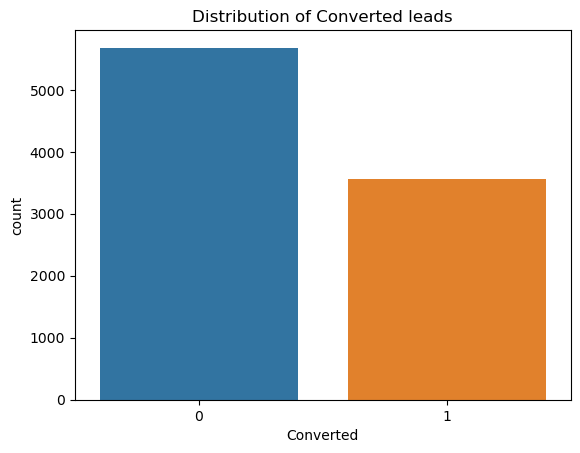

In [31]:
sns.countplot(x='Converted', data=leads)
plt.title('Distribution of Converted leads')
plt.show()

In [ ]:
# not converted(0), converted(1) we can see there is difference but its not that huge.

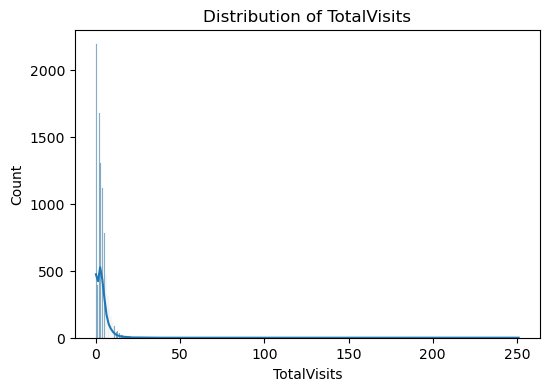

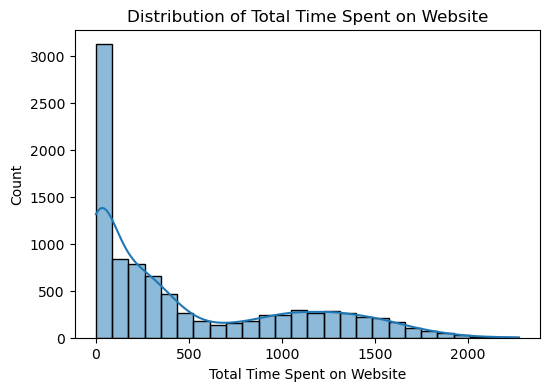

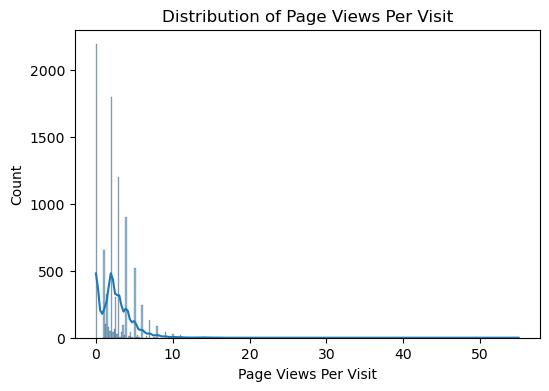

In [34]:
numerical_features = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']
for feature in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(leads[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [36]:
cat_cols = ['Lead Source', 'Last Activity', 'Country', 'Specialization', 
                        'What is your current occupation', 
                       'What matters most to you in choosing a course']
for col in categorical_columns:
    lead[col].fillna(lead[col].mode()[0], inplace=True)

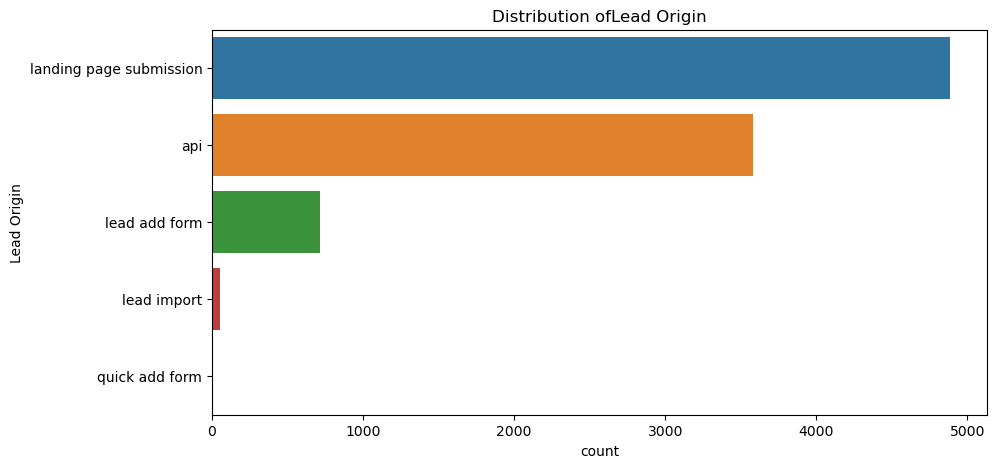

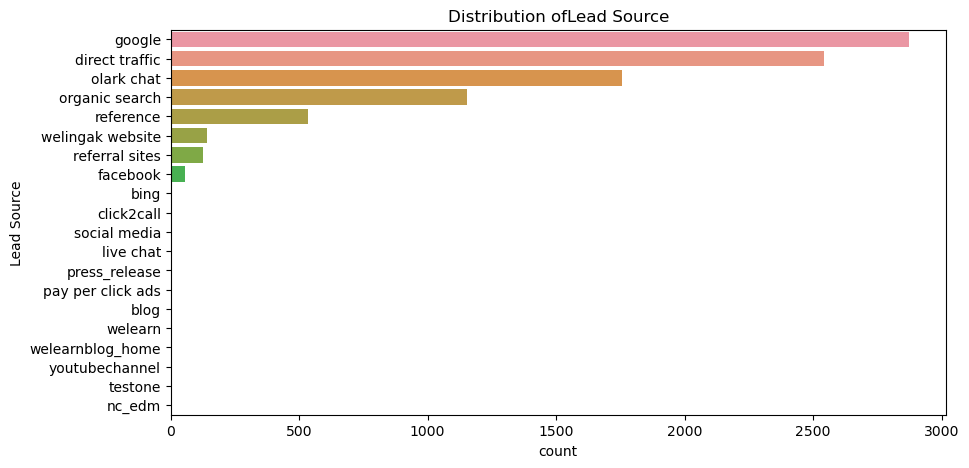

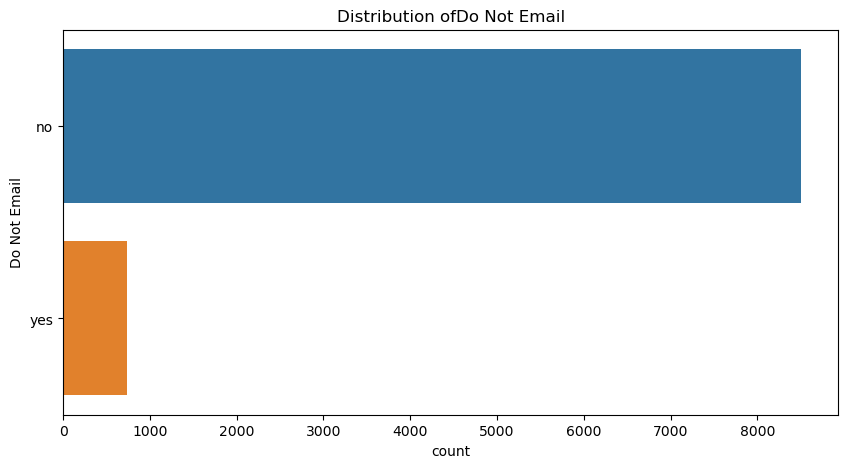

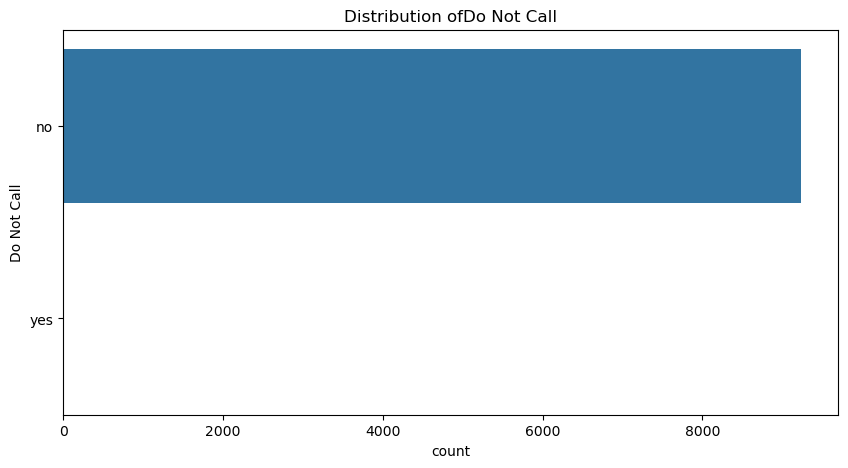

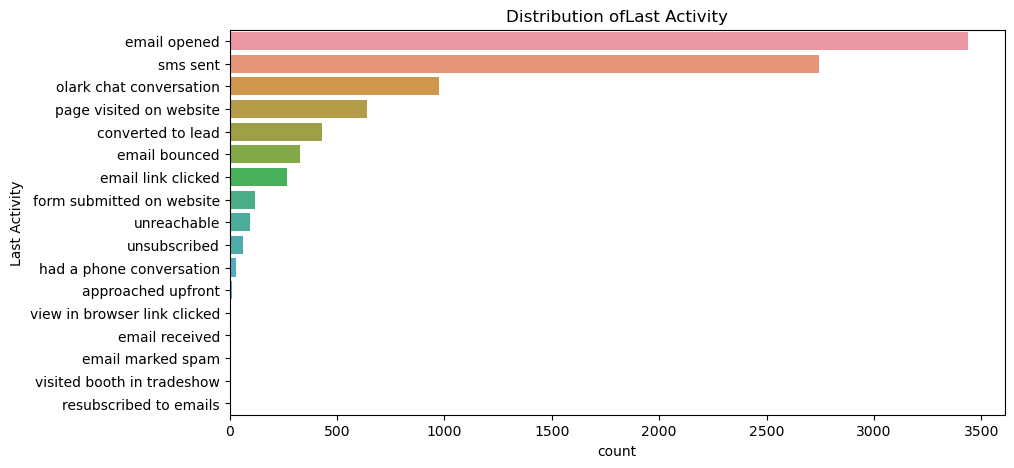

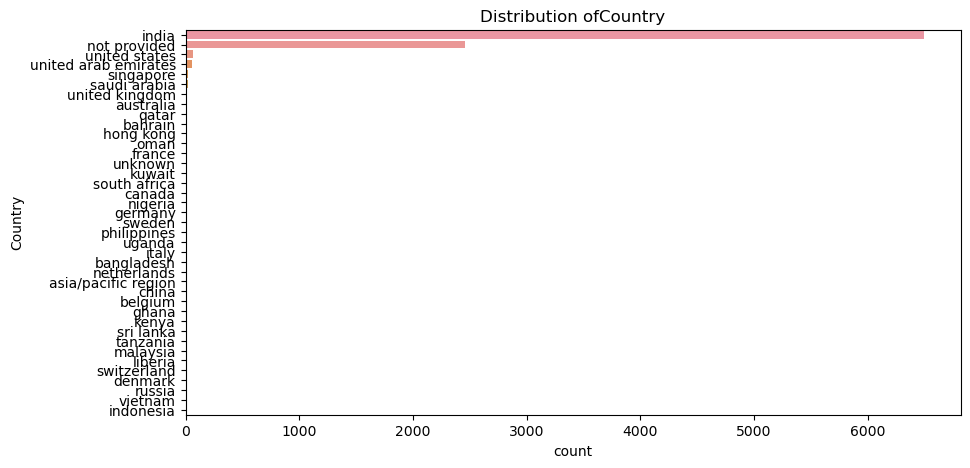

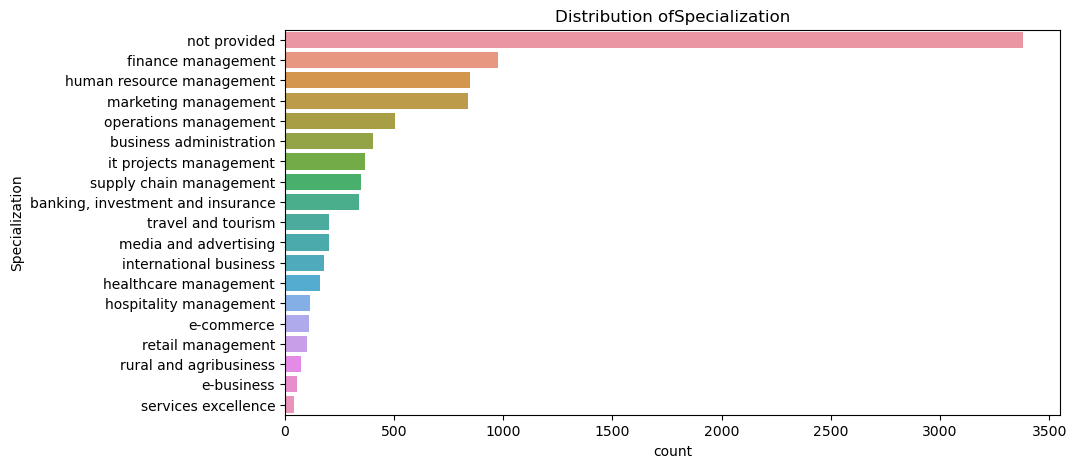

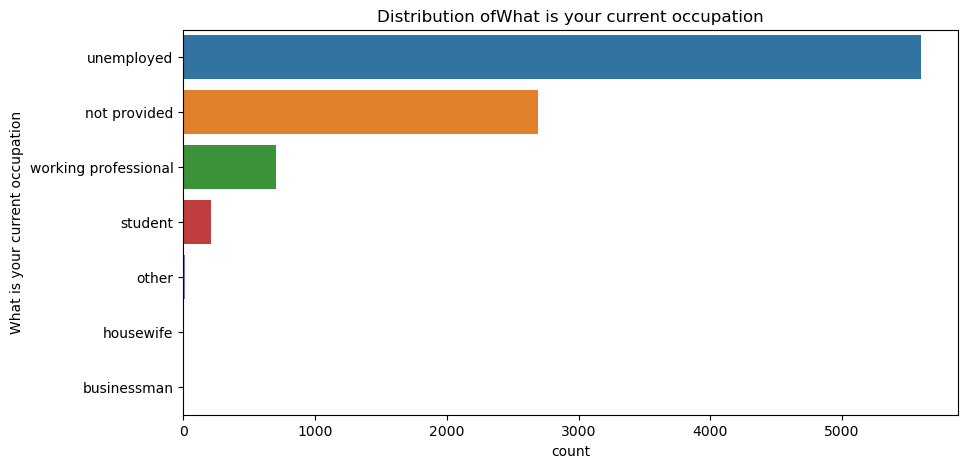

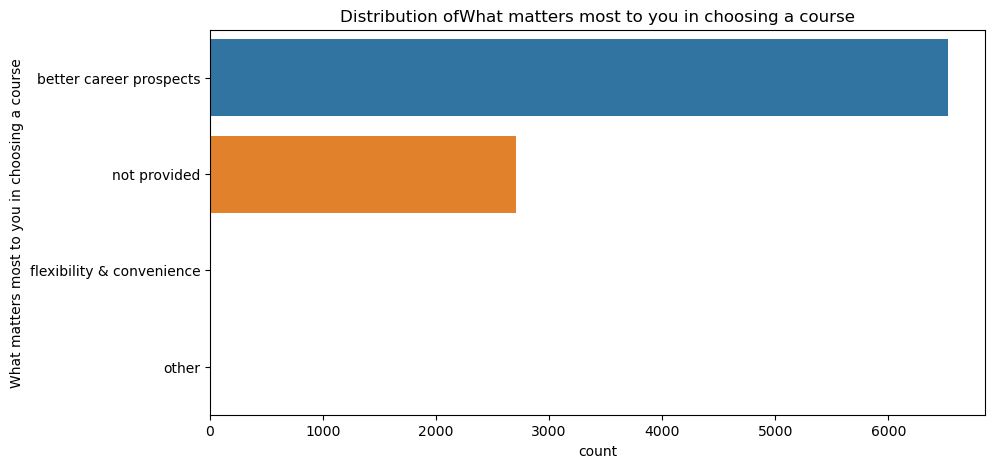

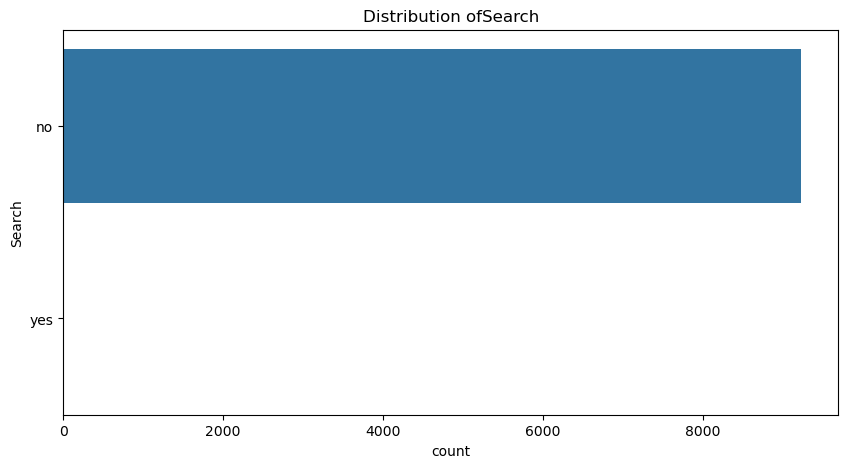

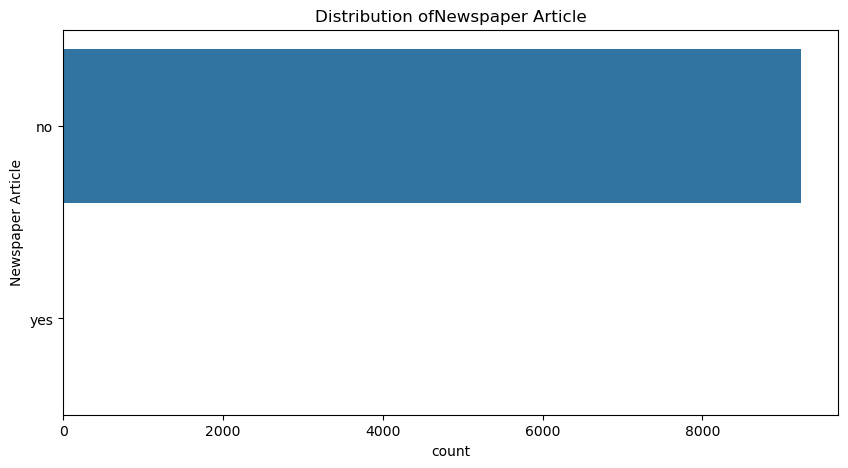

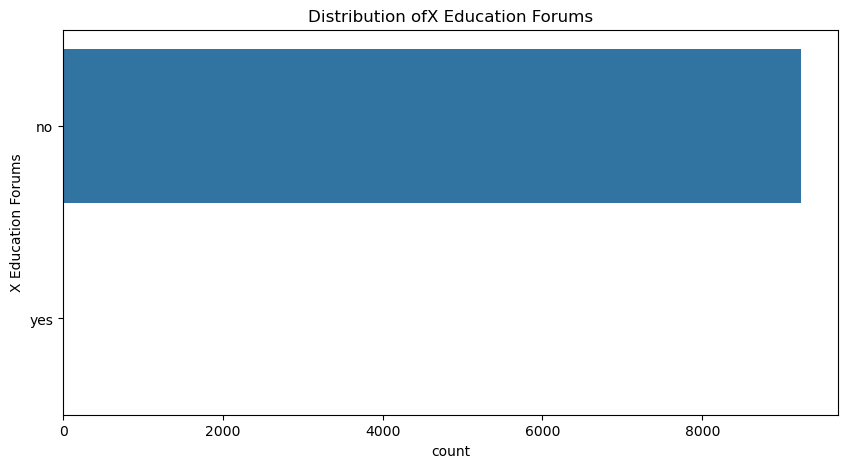

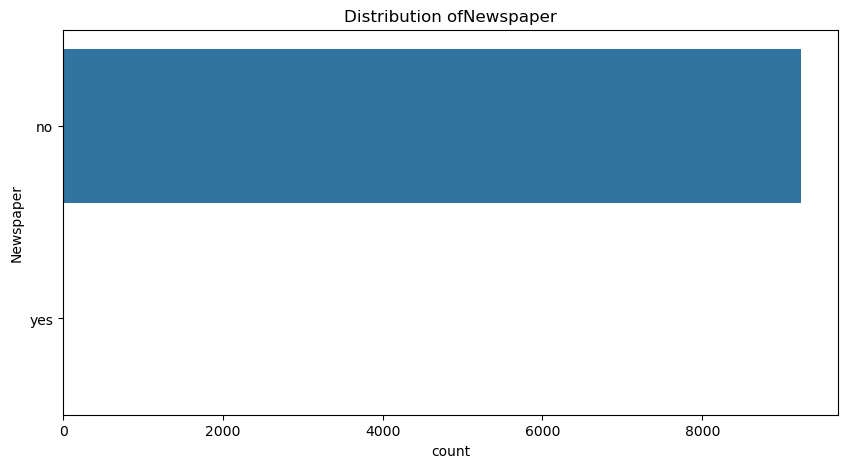

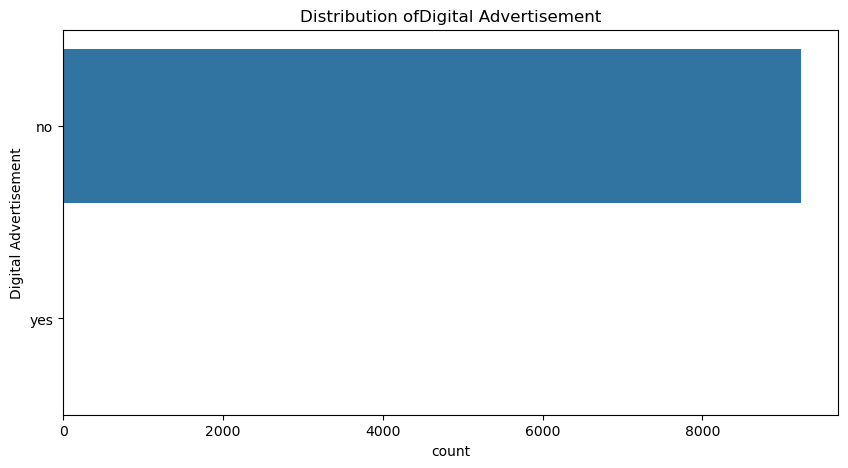

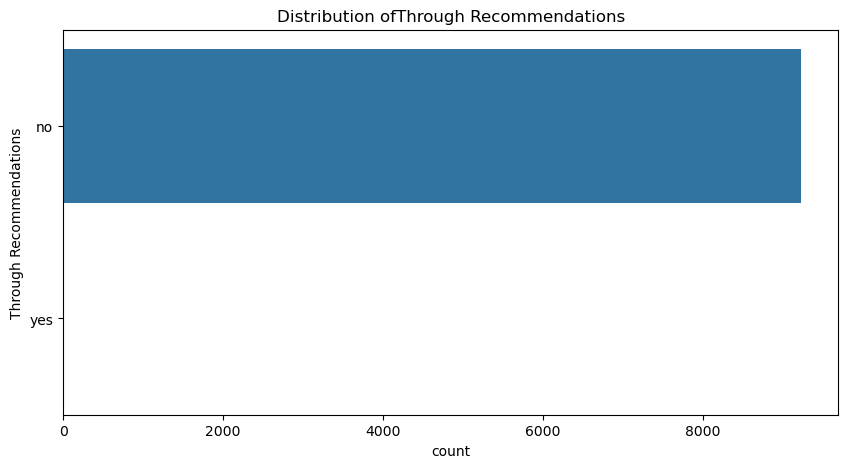

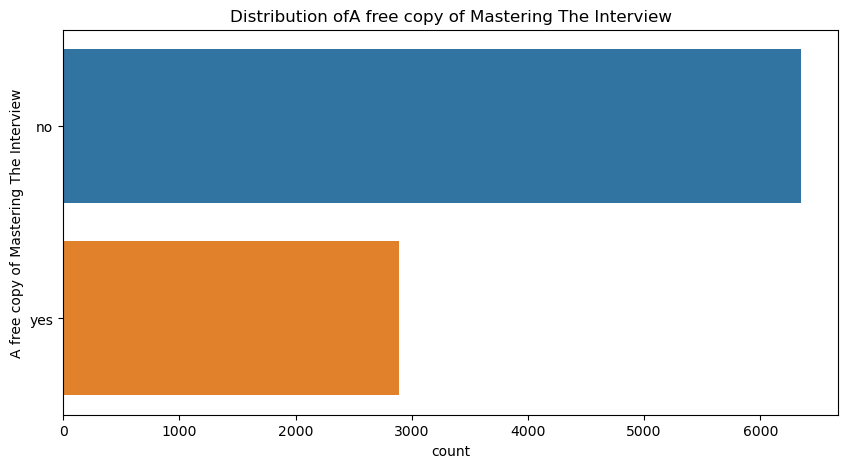

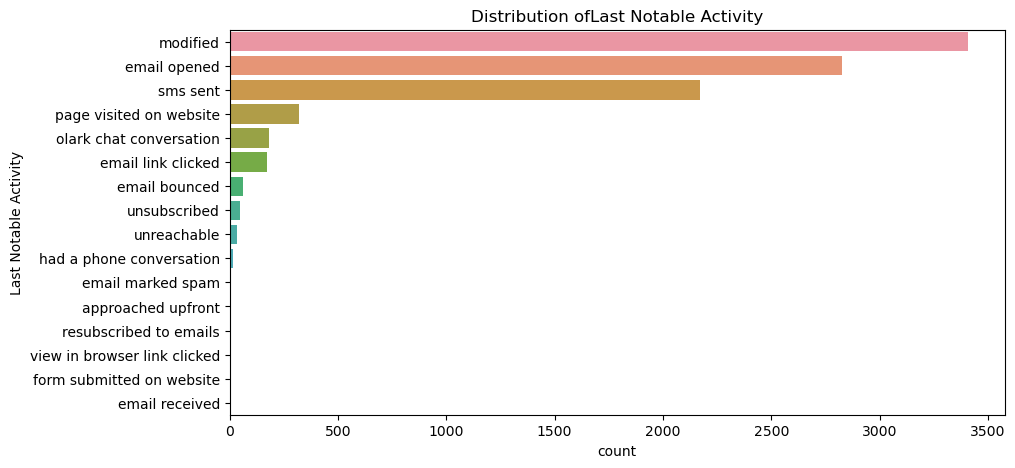

In [38]:
cat_cols= leads.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(y=col, data=leads, order=leads[col].value_counts().index)
    plt.title(f'Distribution of{col}')
    plt.show()

##### Most of the leads are originated from landing page submissions.
 Lead source is mostly from Google followed by direct traffic.
 
 Most people prefer to not receive mails.
 
 Everyone prefer not to receive calls either.
 
 people's last activity is email opened .
 
 most of the leads are from India
 
 
 Most people prefer to not give specialization but if you desperately want   to know followed by financial management.
 
 Most leads are unemployed.
 
 Most leads choose this cause of better career prospects.
 
 Nobody saw the AD in newspaper, newspaper article, X Education forumns, Digital advertisement,Recomendations.

 Some leads got to know about them by distribution of free copy of mastering the interview. 
 
 Leads last notable activity was modified.

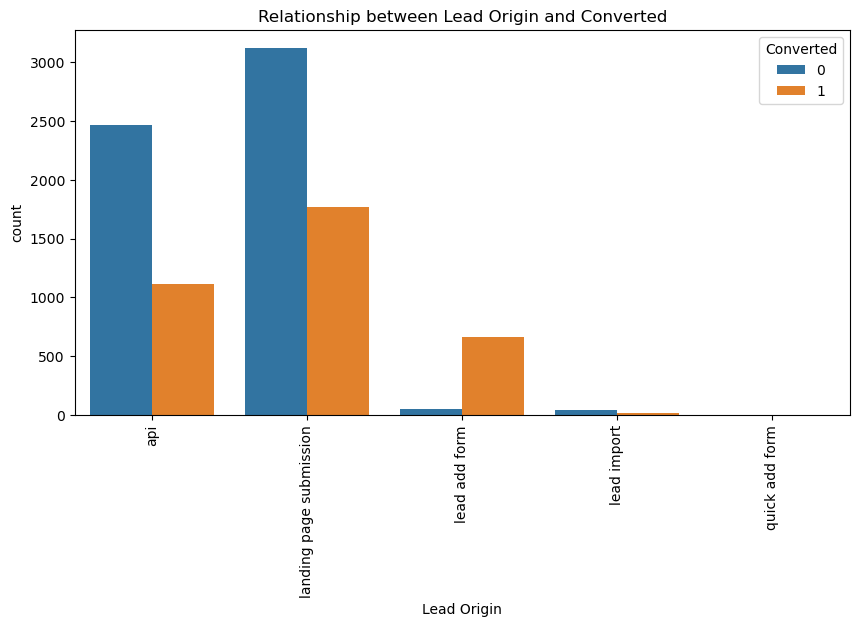

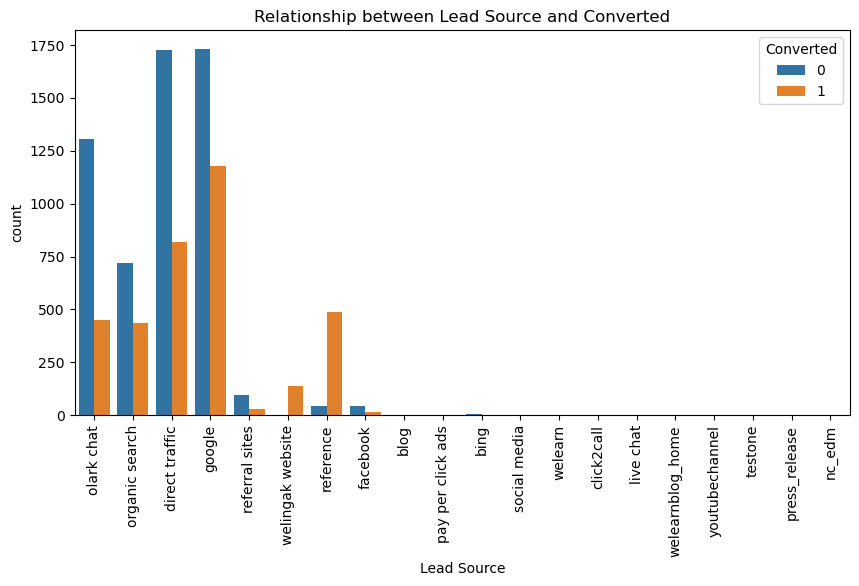

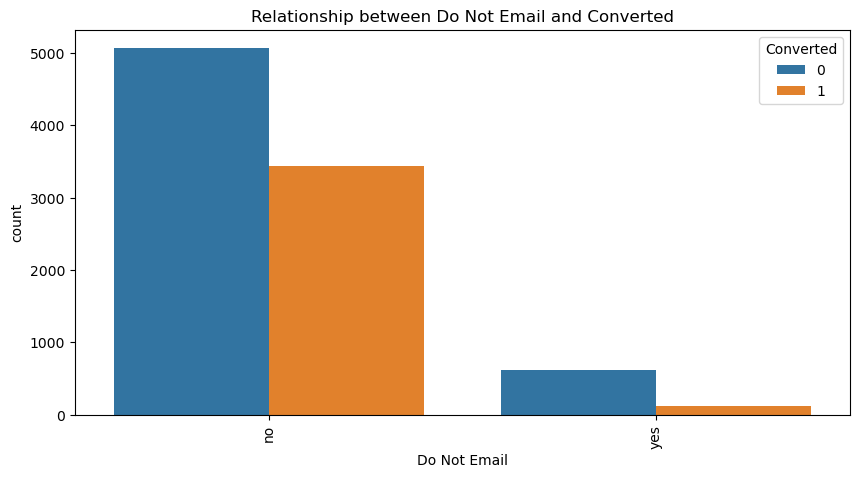

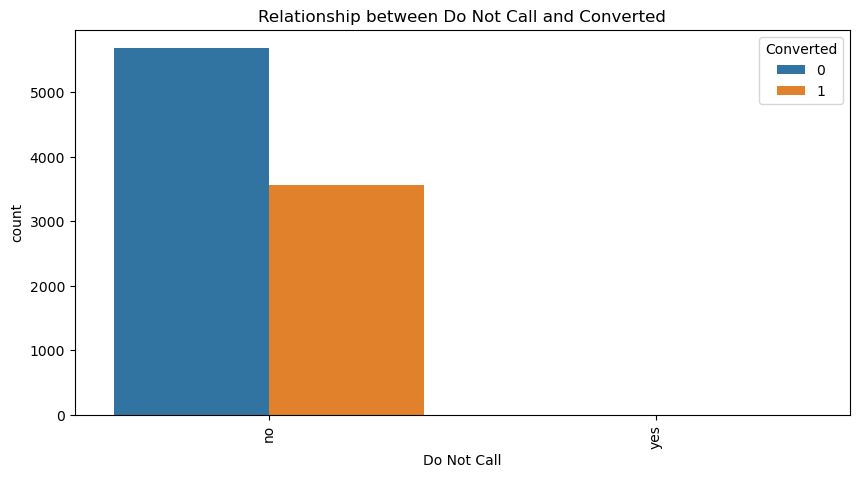

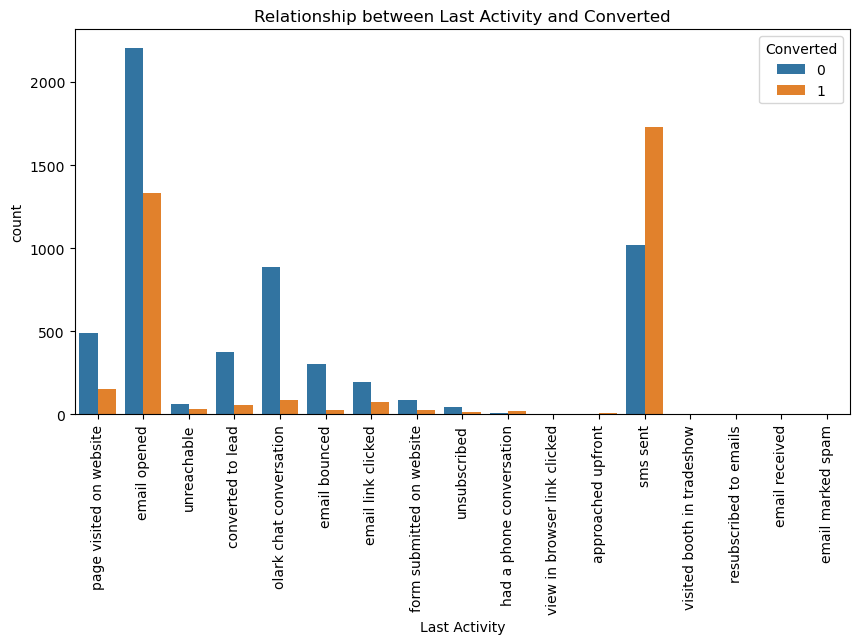

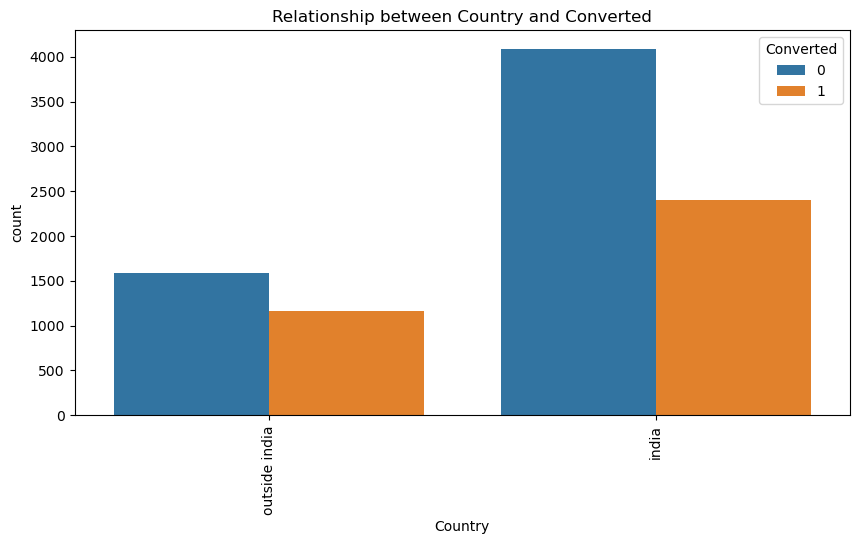

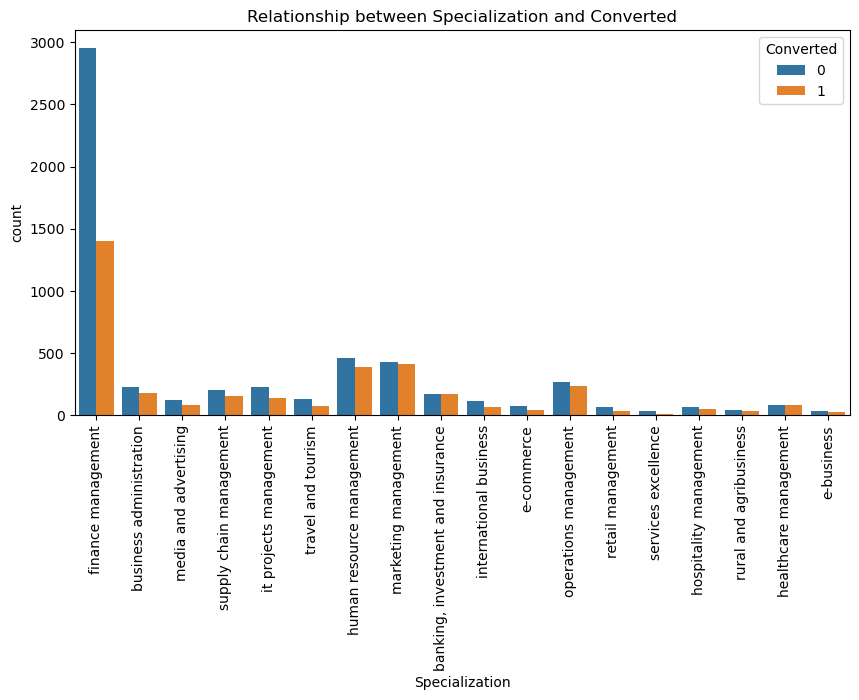

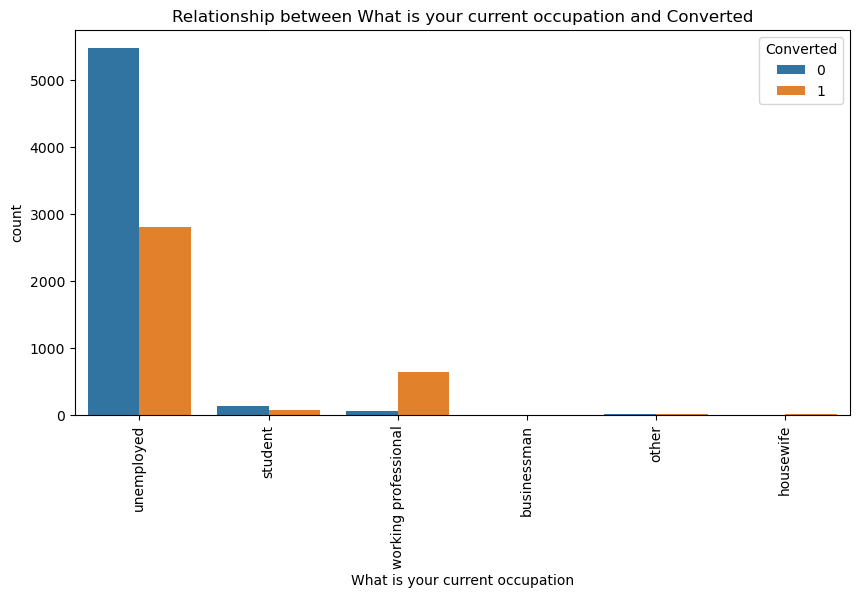

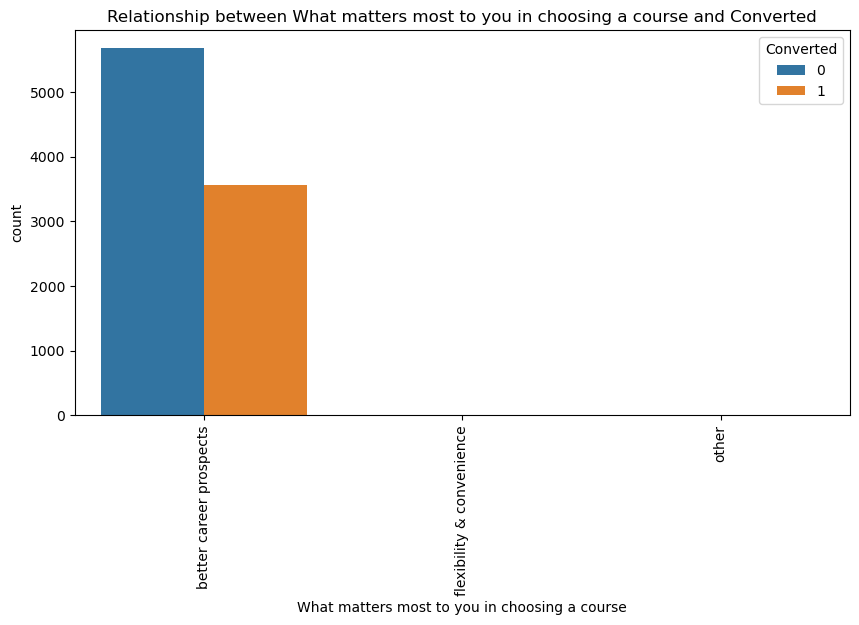

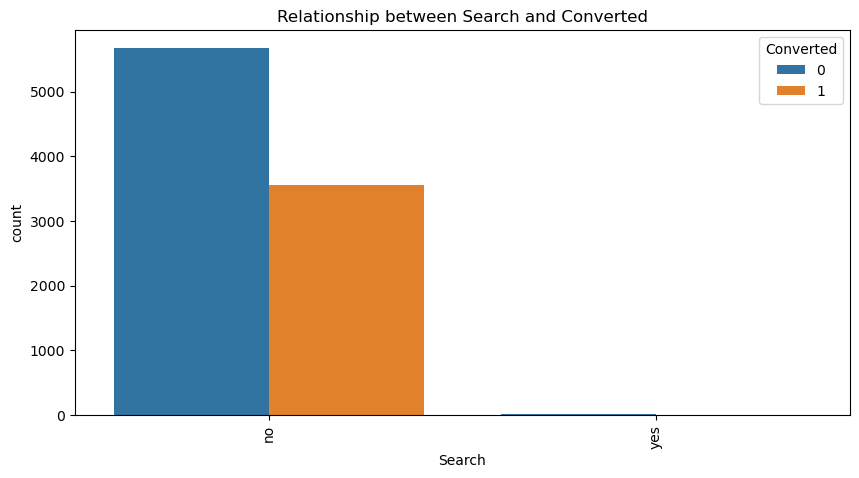

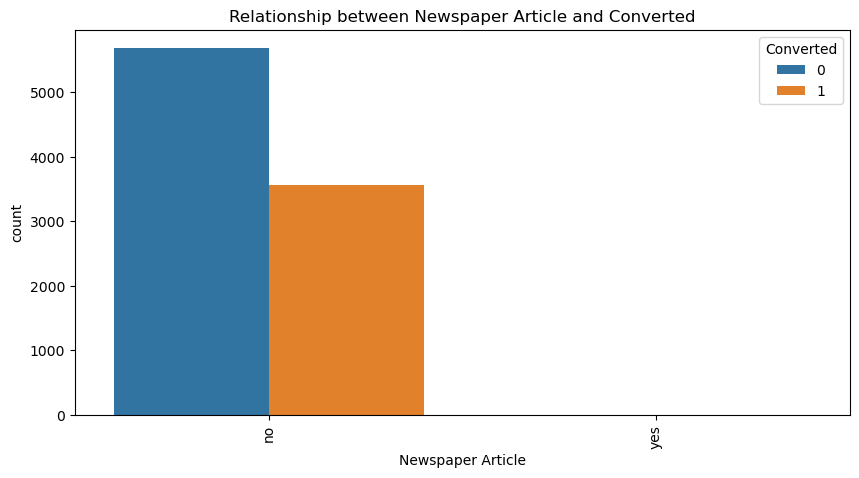

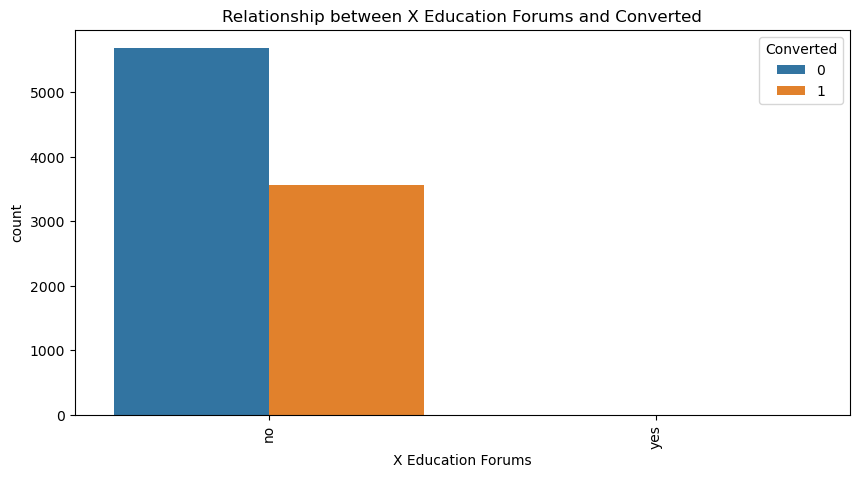

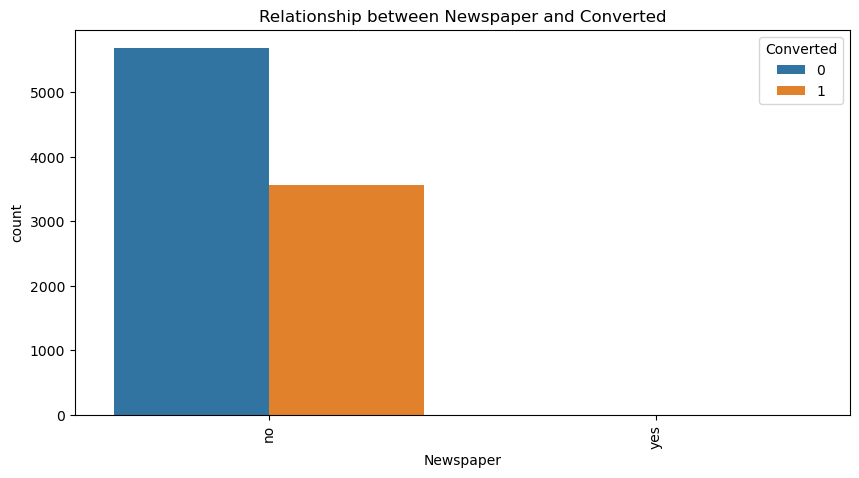

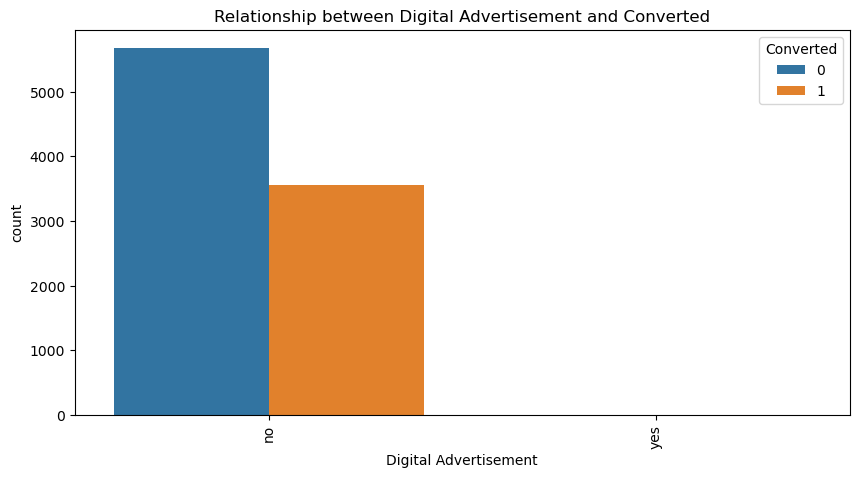

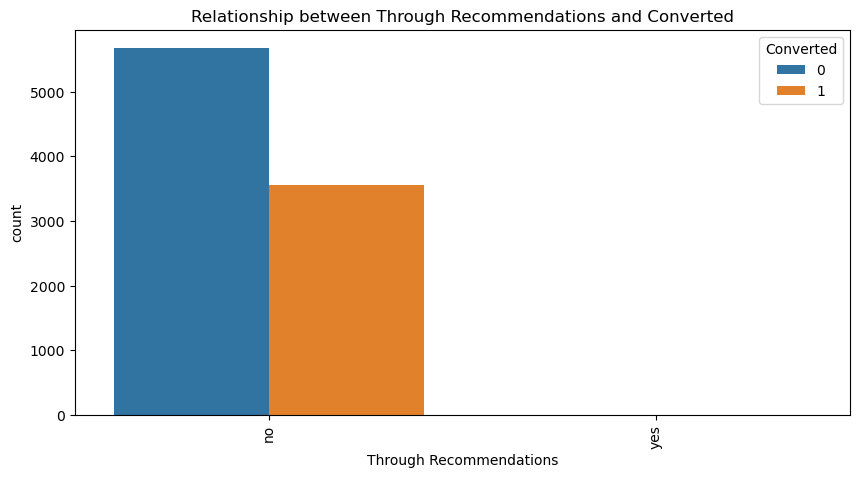

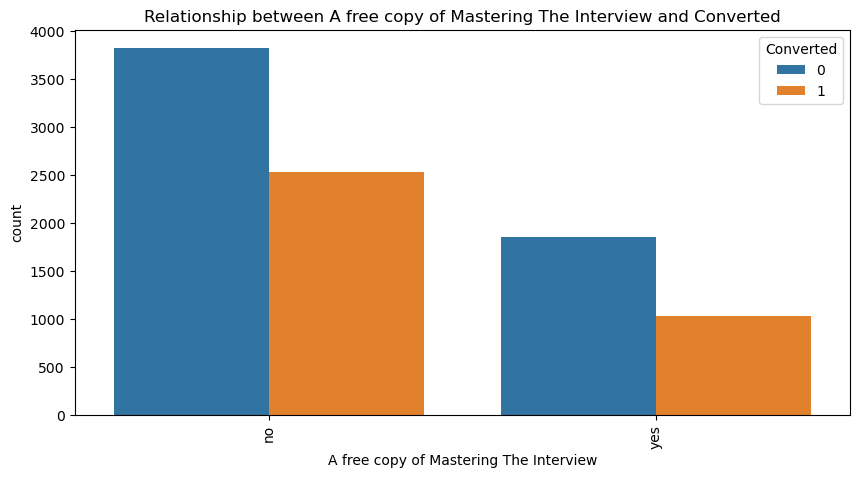

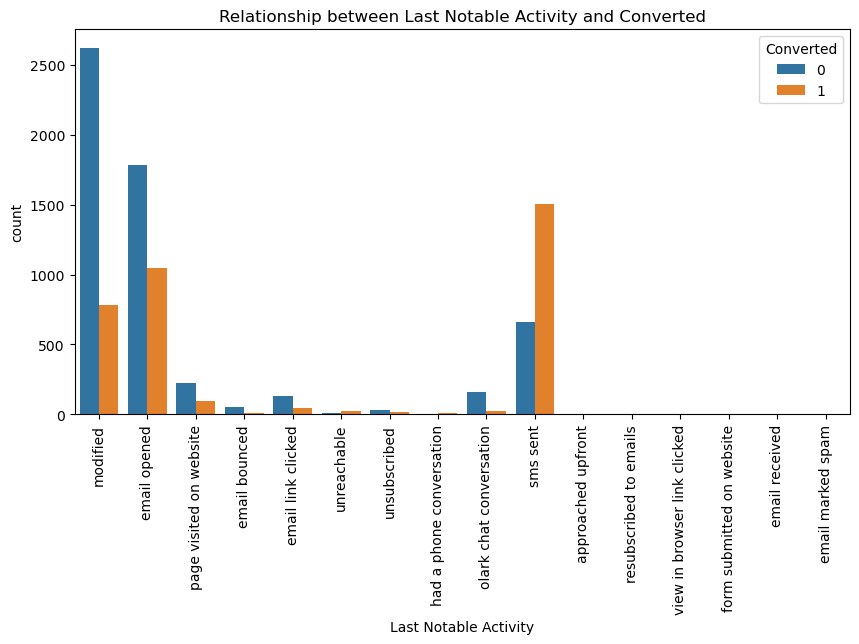

In [39]:
# Categorical Variables VS target variables
categorical_cols = leads.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='Converted', data=lead)
    plt.title(f'Relationship between {col} and Converted')
    plt.xticks(rotation=90)
    plt.show()

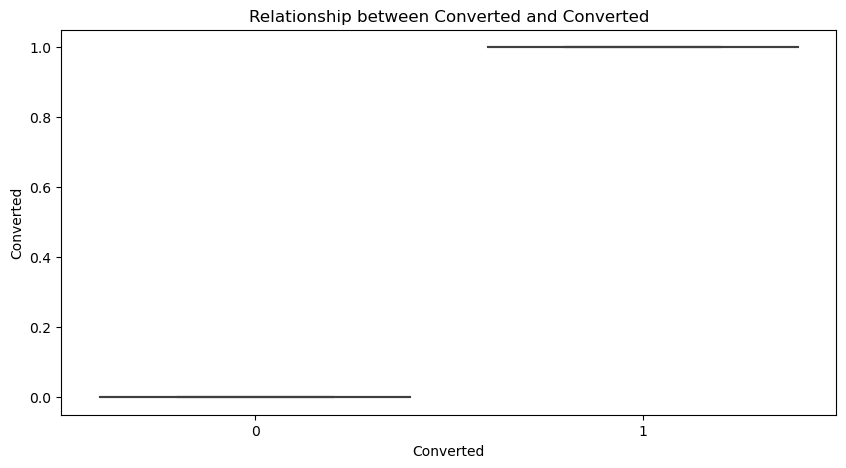

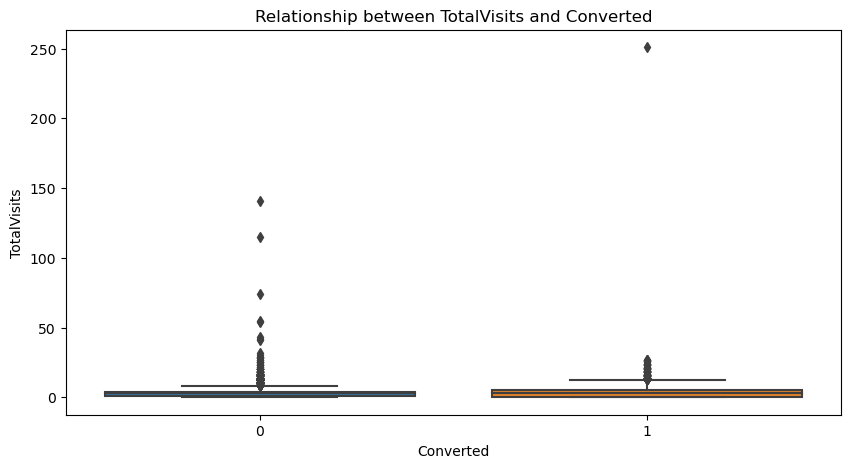

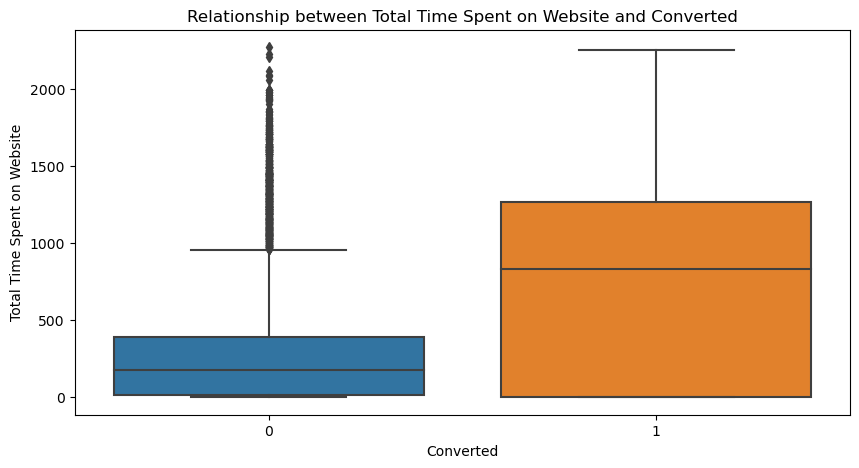

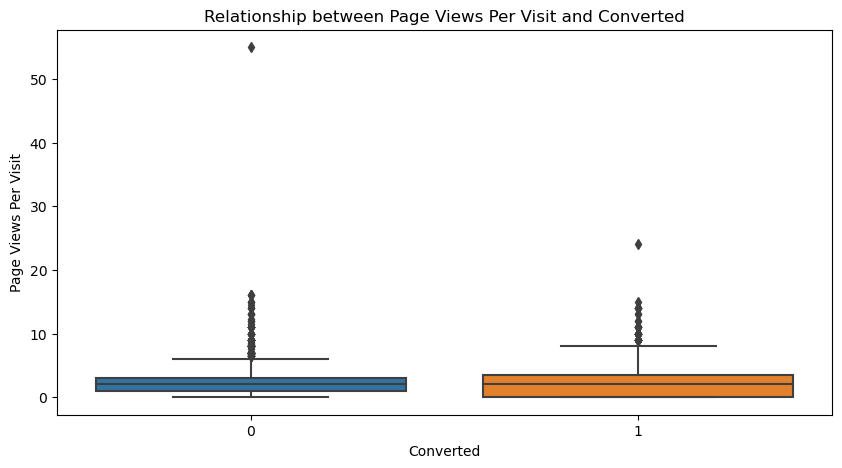

In [40]:
# numerical variable vs target variable
numerical_cols = leads.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Converted', y=col, data=lead)
    plt.title(f'Relationship between {col} and Converted')
    plt.show()

In [ ]:
# Observations:
# Most people who spends more time on website got converted successfully.
# Most leads who visits the website got converted.

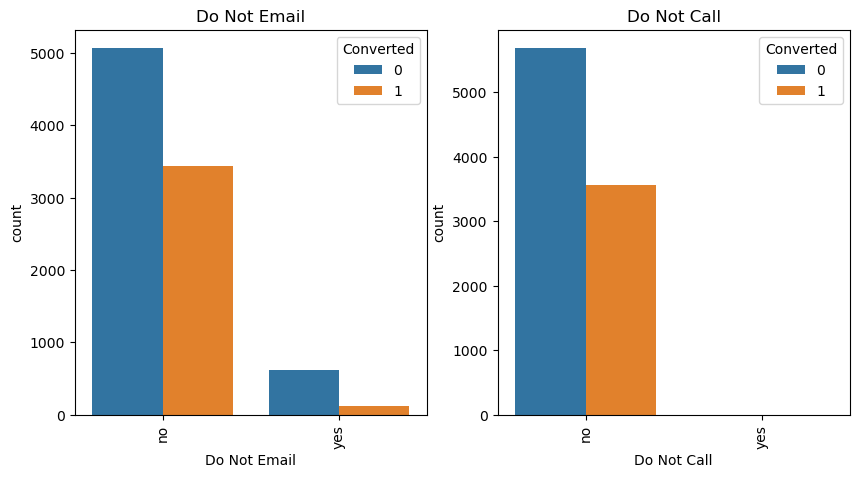

In [42]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

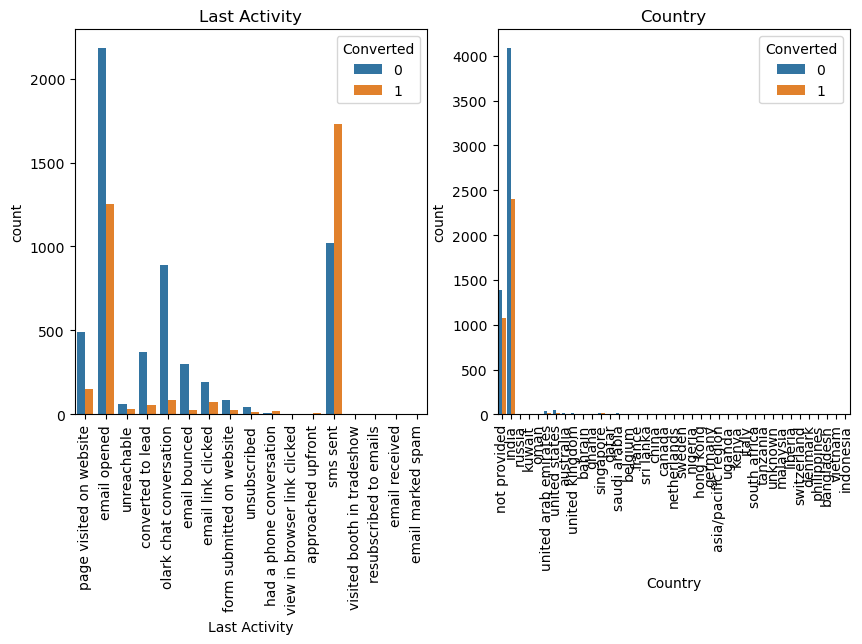

In [43]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

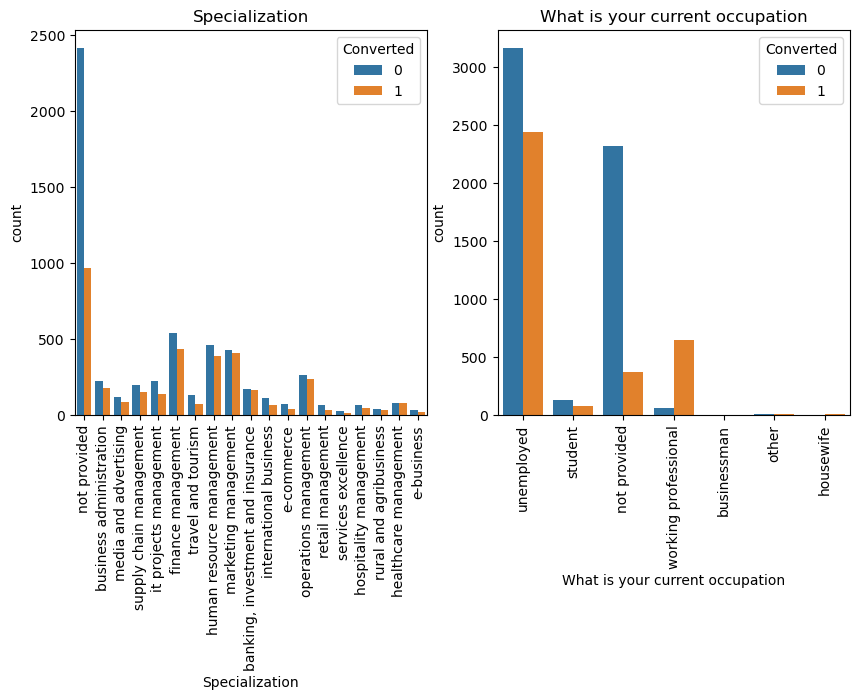

In [44]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

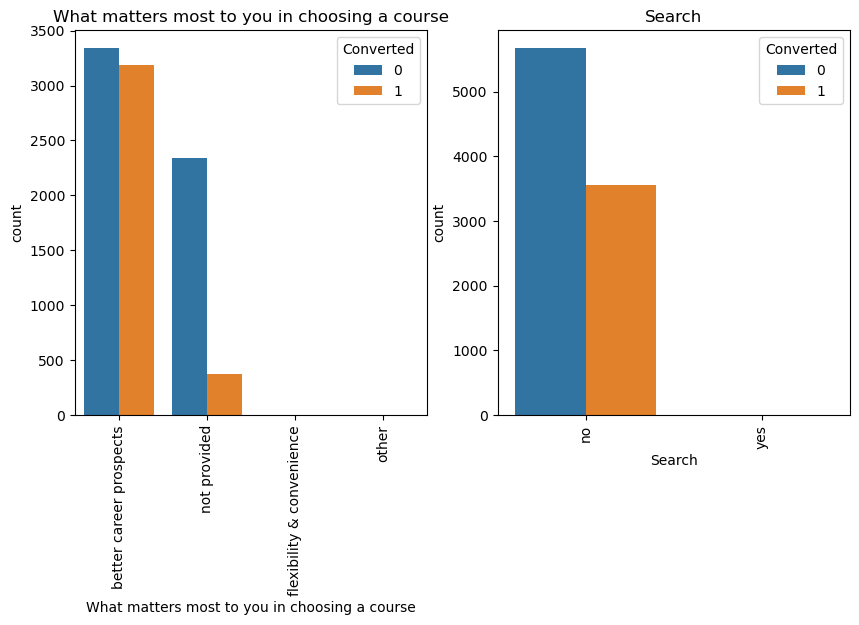

In [45]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

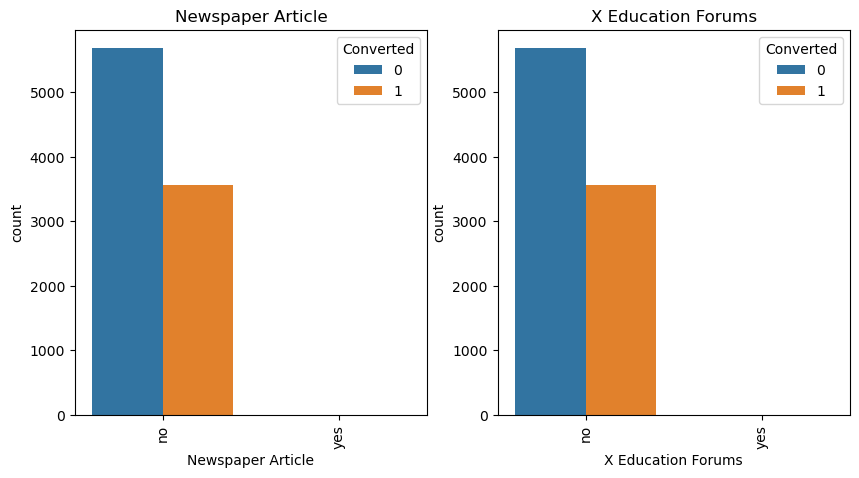

In [46]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

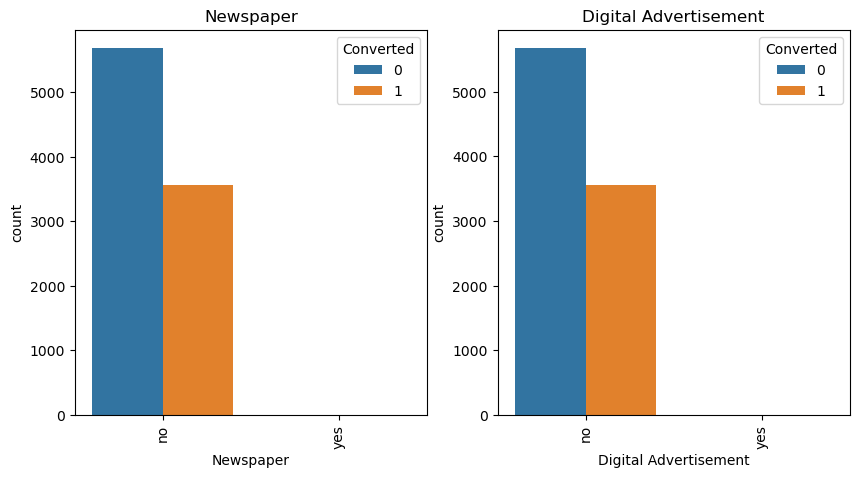

In [47]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

In [ ]:
# This can prove that no one is looking at the advertisement on newspaper, education forums, digital advertisements.
# The company can reduce the cost for the advertisement and improve the website and SEO maybe.

In [48]:
numeric = lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


### Step-4: Dummy Variables

In [49]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [52]:
leads.loc[:, lead.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [53]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leads[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
leads_dum = pd.concat([leads, dummy], axis=1)
leads_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,False,False,True,False,False,False,False,False,False,False
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,False,False,False,False,False,False,False,False,False,False
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,False,False,False,False,False,False,False,False,False,False
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,False,False,True,False,False,False,False,False,False,False
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,saudi arabia,...,False,False,False,False,False,False,False,False,False,False
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False


In [59]:
# Convert all Boolean columns to integers
for column in leads_dum.columns:
    if leads_dum[column].dtype == 'bool':
        leads_dum[column] = leads_dum[column].astype(int)



In [60]:
leads_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,saudi arabia,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [61]:
# dropping the cols
leads_dum = leads_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)
leads_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Specialization_business administration,Specialization_e-business,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Step-5: Test-Train Split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
leads_dum.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Specialization_business administration,Specialization_e-business,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [64]:
leads_dum.shape

(9240, 82)

In [69]:
# Assigning values to X
X = leads_dum.drop(columns=['Converted'])

In [70]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [71]:
X.shape

(9240, 81)

In [72]:
# assigning to y
y= leads_dum['Converted']

In [73]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [74]:
# Splitting the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [75]:
leads_dum.fillna('no', inplace=True)

In [76]:
leads_dum.replace({'yes': True, 'no': False}, inplace=True)

In [77]:
leads_dum.replace({'True': True, 'False': False}, inplace=True)

In [78]:
leads_dum = leads_dum.applymap(lambda x: int(x) if isinstance(x, bool) else x)

In [79]:
# now all the nan are converted. 
leads_dum.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Specialization_business administration,Specialization_e-business,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


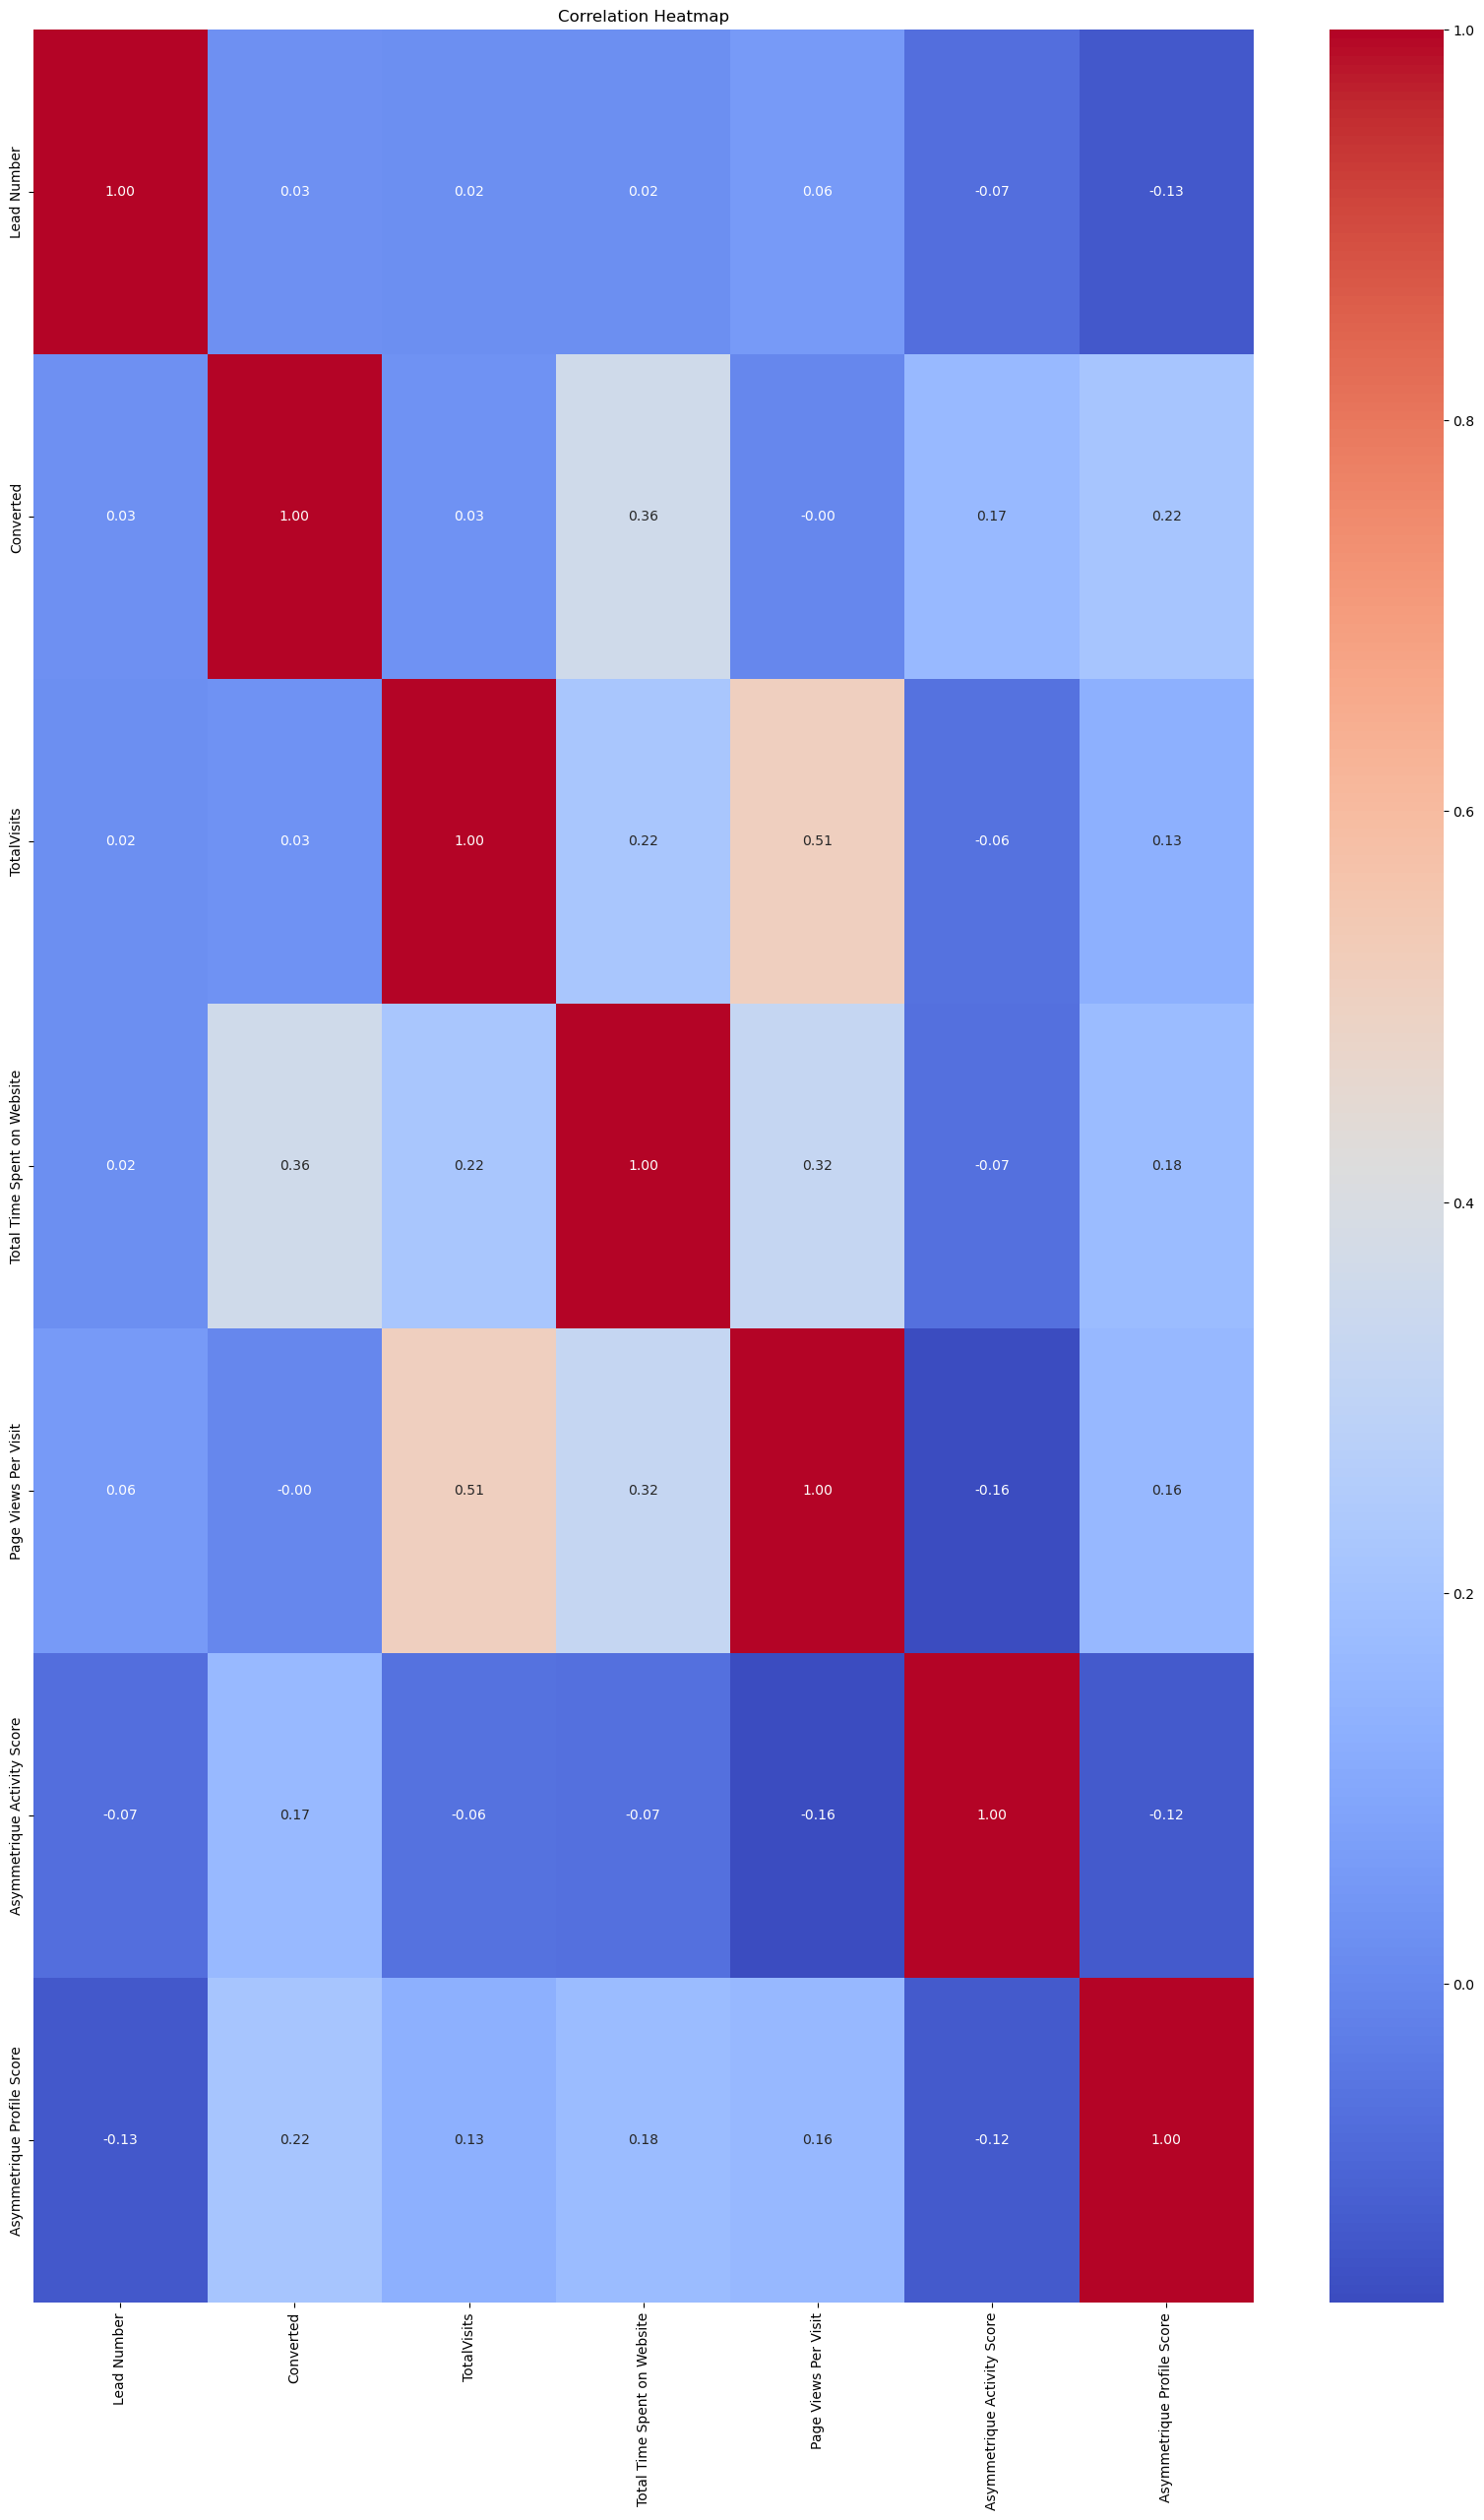

In [80]:
# numeric columns
numeric_cols = lead_dum.select_dtypes(include=['number']).columns

# Computing correlation matrix
corr_matrix = lead_dum[numeric_cols].corr()

# heatmap
plt.figure(figsize=(20, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Step-6: Model building

In [82]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [83]:
from sklearn.feature_selection import RFE

In [103]:
# starting with Logistic Regression
logreg = LogisticRegression()

# Initialize RFE with Logistic Regression and the number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\SAIPUJA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SAIPUJA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [105]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1871,0.0,0,0.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,4.0,487,1.33,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,5.0,106,2.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,5.0,1230,5.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0.0,0,0.00,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [107]:
logreg = LogisticRegression()

# Initialize RFE with Logistic Regression and the number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\SAIPUJA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SAIPUJA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

### Step- 7: Rescaling 

In [108]:
# using minmaxscaler to standardise cols.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1871,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.015936,0.214349,0.024182,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.019920,0.046655,0.045455,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.019920,0.541373,0.090909,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [110]:
# Converting
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.53896103896104

##### the conversion rate is 38.53% ~ 39%

### Step-8 : Model building

In [111]:
import statsmodels.api as sm

#### LM-1:

In [112]:
# Logistic regression model
lm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lm1.fit().summary()

C:\Users\SAIPUJA\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\SAIPUJA\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\SAIPUJA\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6391
Model Family:                Binomial   Df Model:                           76
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 30 Jul 2024   Deviance:                   1.3944e+05
Time:                        15:32:57   Pearson chi2:                 6.82e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -3.685e+14   2.79e+07  -1.32e+07      0.000   -3.68e+14   -3.68e+14
TotalVisits                                           2.931e+15   4.72e+07   6.21e+07      0.000    2.93e+15    2.93e+15
Total Time Spent on Website                           4.499e+13   3.94e+06   1.14e+07      0.000     4.5e+13     4.5e+13
Page Views Per Visit                                 -4.753e+14   3.04e+07  -1.56e+07      0.000   -4.75e+14   -4.75e+14
Lead Origin_landing page submission                  -1.593e+14   3.07e+06  -5.19e+07      0.000   -1.59e+14   -1.59e+14
Lead Origin_lead add form                             4.049e+14   2.74e+07   1.48e+07      0.000    4.05e+14    4.05e+14
Lead Origin_lead import                                5.04e+14      5e+07   1.01e+07      0.000    5.04e+14    5.04e+14
Lead Origin_quick add form                            4.489e+15   7.31e+07   6.14e+07      0.000    4.49e+15    4.49e+15
Specialization_business administration                5.925e+13   4.71e+06   1.26e+07      0.000    5.93e+13    5.93e+13
Specialization_e-business                             2.292e+14   1.14e+07   2.01e+07      0.000    2.29e+14    2.29e+14
Specialization_e-commerce                             5.296e+14   7.83e+06   6.76e+07      0.000     5.3e+14     5.3e+14
Specialization_finance management                     2.953e+13   3.58e+06   8.24e+06      0.000    2.95e+13    2.95e+13
Specialization_healthcare management                   2.59e+14   7.15e+06   3.62e+07      0.000    2.59e+14    2.59e+14
Specialization_hospitality management                -1.213e+14   7.62e+06  -1.59e+07      0.000   -1.21e+14   -1.21e+14
Specialization_human resource management             -4.345e+13    3.7e+06  -1.17e+07      0.000   -4.34e+13   -4.34e+13
Specialization_international business                 3.848e+13    6.6e+06   5.83e+06      0.000    3.85e+13    3.85e+13
Specialization_it projects management                 9.994e+12   5.05e+06   1.98e+06      0.000    9.99e+12    9.99e+12
Specialization_marketing management                    9.64e+13   3.59e+06   2.68e+07      0.000    9.64e+13    9.64e+13
Specialization_media and advertising                    1.3e+13   6.41e+06   2.03e+06      0.000     1.3e+13     1.3e+13
Specialization_operations management                 -2.298e+13   4.26e+06  -5.39e+06      0.000    -2.3e+13    -2.3e+13
Specialization_retail management                      6.742e+13   8.45e+06   7.97e+06      0.000    6.74e+13    6.74e+13
Specialization_rural and agribusiness                -3.583e+14   1.02e+07  -3.52e+07      0.000   -3.58e+14   -3.58e+14
Specialization_services excellence                   -2.06

In [ ]:
### there are so many variable so we cant go one by one. So, going  for feature selection.

### Step-9: Feature selection

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [117]:
logreg= LogisticRegression()

In [ ]:
rfe= RFE(estimator=logreg, n_features_to_select=20)
rfe= rfe.fit(X_train, y_train)

In [121]:
rfe.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False,  True, False, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False,  True, False,  True,
        True,  True, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False,  True, False, False])

In [122]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_landing page submission', False, 20),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 37),
 ('Lead Origin_quick add form', False, 43),
 ('Specialization_business administration', False, 29),
 ('Specialization_e-business', False, 25),
 ('Specialization_e-commerce', False, 16),
 ('Specialization_finance management', False, 19),
 ('Specialization_healthcare management', False, 17),
 ('Specialization_hospitality management', False, 32),
 ('Specialization_human resource management', False, 27),
 ('Specialization_international business', False, 47),
 ('Specialization_it projects management', False, 18),
 ('Specialization_marketing management', False, 23),
 ('Specialization_media and advertising', False, 22),
 ('Specialization_operations management', False, 28),
 ('Specialization_retail management', False, 49),
 ('Specialization_rural and agrib

In [123]:
# Variable supported by rfe
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_direct traffic',
       'Lead Source_facebook', 'Lead Source_google',
       'Lead Source_organic search', 'Lead Source_referral sites',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_had a phone conversation', 'Last Activity_sms sent',
       'What is your current occupation_housewife',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_unreachable'],
      dtype='object')

#### LM-2:

In [124]:
X_train_sm = sm.add_constant(X_train[col])
lm2= sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res= lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2602.6
Date:                Tue, 30 Jul 2024   Deviance:                       5205.1
Time:                        15:40:40   Pearson chi2:                 6.91e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4082
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8452      0.107    -17.318      0.000      -2.054      -1.636
TotalVisits                                              5.5878      1.856      3.010      0.003       1.950       9.226
Total Time Spent on Website                              4.5501      0.167     27.250      0.000       4.223       4.877
Lead Origin_lead add form                                2.3094      0.198     11.682      0.000       1.922       2.697
Lead Source_direct traffic                              -1.5415      0.119    -12.907      0.000      -1.776      -1.307
Lead Source_facebook                                    -1.2309      0.517     -2.380      0.017      -2.245      -0.217
Lead Source_google                                      -1.1074      0.114     -9.709      0.000      -1.331      -0.884
Lead Source_organic search                              -1.3555      0.141     -9.629      0.000      -1.631      -1.080
Lead Source_referral sites                              -1.3272      0.330     -4.019      0.000      -1.974      -0.680
Lead Source_welingak website                             1.8726      0.742      2.523      0.012       0.418       3.327
Do Not Email_yes                                        -1.2202      0.170     -7.169      0.000      -1.554      -0.887
Last Activity_had a phone conversation                   1.2941      0.969      1.335      0.182      -0.606       3.194
Last Activity_sms sent                                   1.2568      0.075     16.687      0.000       1.109       1.404
What is your current occupation_housewife               23.9913   1.38e+04      0.002      0.999    -2.7e+04     2.7e+04
What is your current occupation_student                  1.1709      0.242      4.837      0.000       0.696       1.645
What is your current occupation_unemployed               1.0795      0.087     12.390      0.000       0.909       1.250
What is your current occupation_working professional     3.6399      0.200     18.181      0.000       3.248       4.032
Last Notable Activity_had a phone conversation           1.9989      1.477      1.353      0.176      -0.896       4.894
Last Notable Activity_modified                          -0.9146      0.080    -11.425      0.000      -1.072      -0.758
Last Notable Activity_olark chat conversation           -1.1228      0.334     -3.359      0.001      -1.778      -0.468
Last Notable Activity_unreachable                        1.8275      0.536      3.408      0.001       0.777       2.878
========================================================================================================================
"""

In [ ]:
# removing 'What is your current occupation_housewife' cause it has highes p-value (0.999)

In [125]:
col= col.drop('What is your current occupation_housewife')

#### LM-3:

In [126]:
X_train_sm = sm.add_constant(X_train[col])
lm3= sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res= lm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.9
Date:                Tue, 30 Jul 2024   Deviance:                       5229.7
Time:                        15:43:43   Pearson chi2:                 6.96e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4060
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8181      0.106    -17.195      0.000      -2.025      -1.611
TotalVisits                                              5.4870      1.847      2.971      0.003       1.867       9.107
Total Time Spent on Website                              4.5421      0.167     27.275      0.000       4.216       4.869
Lead Origin_lead add form                                2.3712      0.197     12.017      0.000       1.984       2.758
Lead Source_direct traffic                              -1.5271      0.119    -12.825      0.000      -1.760      -1.294
Lead Source_facebook                                    -1.2237      0.517     -2.368      0.018      -2.237      -0.211
Lead Source_google                                      -1.0912      0.114     -9.600      0.000      -1.314      -0.868
Lead Source_organic search                              -1.3359      0.140     -9.522      0.000      -1.611      -1.061
Lead Source_referral sites                              -1.3213      0.329     -4.011      0.000      -1.967      -0.676
Lead Source_welingak website                             1.8240      0.742      2.457      0.014       0.369       3.279
Do Not Email_yes                                        -1.2275      0.170     -7.212      0.000      -1.561      -0.894
Last Activity_had a phone conversation                   1.2771      0.969      1.318      0.188      -0.622       3.177
Last Activity_sms sent                                   1.2456      0.075     16.573      0.000       1.098       1.393
What is your current occupation_student                  1.1342      0.242      4.688      0.000       0.660       1.608
What is your current occupation_unemployed               1.0448      0.086     12.120      0.000       0.876       1.214
What is your current occupation_working professional     3.6027      0.200     18.039      0.000       3.211       3.994
Last Notable Activity_had a phone conversation           2.0023      1.476      1.357      0.175      -0.890       4.895
Last Notable Activity_modified                          -0.9133      0.080    -11.445      0.000      -1.070      -0.757
Last Notable Activity_olark chat conversation           -1.1332      0.334     -3.394      0.001      -1.788      -0.479
Last Notable Activity_unreachable                        1.8091      0.535      3.380      0.001       0.760       2.858
========================================================================================================================
"""

In [ ]:
# next is 'Last Activity_had a phone conversation' since it is (0.188)

In [128]:
col= col.drop('Last Activity_had a phone conversation')

#### LM-4:

In [129]:
X_train_sm = sm.add_constant(X_train[col])
lm4= sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res= lm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.8
Date:                Tue, 30 Jul 2024   Deviance:                       5231.6
Time:                        15:45:47   Pearson chi2:                 6.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4058
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8201      0.106    -17.216      0.000      -2.027      -1.613
TotalVisits                                              5.4550      1.843      2.960      0.003       1.843       9.067
Total Time Spent on Website                              4.5465      0.167     27.304      0.000       4.220       4.873
Lead Origin_lead add form                                2.3783      0.197     12.055      0.000       1.992       2.765
Lead Source_direct traffic                              -1.5257      0.119    -12.817      0.000      -1.759      -1.292
Lead Source_facebook                                    -1.2258      0.517     -2.371      0.018      -2.239      -0.212
Lead Source_google                                      -1.0914      0.114     -9.603      0.000      -1.314      -0.869
Lead Source_organic search                              -1.3309      0.140     -9.494      0.000      -1.606      -1.056
Lead Source_referral sites                              -1.2971      0.326     -3.973      0.000      -1.937      -0.657
Lead Source_welingak website                             1.8169      0.742      2.448      0.014       0.362       3.272
Do Not Email_yes                                        -1.2288      0.170     -7.216      0.000      -1.563      -0.895
Last Activity_sms sent                                   1.2439      0.075     16.552      0.000       1.097       1.391
What is your current occupation_student                  1.1333      0.242      4.684      0.000       0.659       1.607
What is your current occupation_unemployed               1.0454      0.086     12.130      0.000       0.877       1.214
What is your current occupation_working professional     3.6105      0.200     18.089      0.000       3.219       4.002
Last Notable Activity_had a phone conversation           3.2806      1.113      2.948      0.003       1.099       5.462
Last Notable Activity_modified                          -0.9075      0.080    -11.395      0.000      -1.064      -0.751
Last Notable Activity_olark chat conversation           -1.1327      0.334     -3.392      0.001      -1.787      -0.478
Last Notable Activity_unreachable                        1.8078      0.535      3.377      0.001       0.759       2.857
========================================================================================================================
"""

In [ ]:
# removing 'Lead Source_facebook' since it is (0.018)

In [130]:
col= col.drop('Lead Source_facebook')

#### LM-5:

In [131]:
X_train_sm = sm.add_constant(X_train[col])
lm5= sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res= lm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.1
Date:                Tue, 30 Jul 2024   Deviance:                       5238.2
Time:                        15:47:04   Pearson chi2:                 6.66e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4052
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8473      0.105    -17.515      0.000      -2.054      -1.641
TotalVisits                                              5.3440      1.832      2.917      0.004       1.754       8.934
Total Time Spent on Website                              4.5305      0.166     27.250      0.000       4.205       4.856
Lead Origin_lead add form                                2.4171      0.197     12.283      0.000       2.031       2.803
Lead Source_direct traffic                              -1.4828      0.118    -12.580      0.000      -1.714      -1.252
Lead Source_google                                      -1.0484      0.112     -9.324      0.000      -1.269      -0.828
Lead Source_organic search                              -1.2874      0.139     -9.256      0.000      -1.560      -1.015
Lead Source_referral sites                              -1.2526      0.326     -3.846      0.000      -1.891      -0.614
Lead Source_welingak website                             1.8164      0.742      2.447      0.014       0.362       3.271
Do Not Email_yes                                        -1.2210      0.170     -7.176      0.000      -1.554      -0.888
Last Activity_sms sent                                   1.2414      0.075     16.547      0.000       1.094       1.388
What is your current occupation_student                  1.1243      0.243      4.630      0.000       0.648       1.600
What is your current occupation_unemployed               1.0378      0.086     12.053      0.000       0.869       1.207
What is your current occupation_working professional     3.6007      0.199     18.056      0.000       3.210       3.992
Last Notable Activity_had a phone conversation           3.2755      1.112      2.944      0.003       1.095       5.456
Last Notable Activity_modified                          -0.9152      0.080    -11.504      0.000      -1.071      -0.759
Last Notable Activity_olark chat conversation           -1.1116      0.334     -3.332      0.001      -1.766      -0.458
Last Notable Activity_unreachable                        1.8058      0.535      3.376      0.001       0.758       2.854
========================================================================================================================
"""

In [ ]:
# next is 'Lead Source_welingak website' (0.014)

In [132]:
col= col.drop('Lead Source_welingak website')

#### LM-6:

In [133]:
X_train_sm = sm.add_constant(X_train[col])
lm6= sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res= lm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.0
Date:                Tue, 30 Jul 2024   Deviance:                       5248.0
Time:                        15:47:59   Pearson chi2:                 6.82e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4043
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8481      0.105    -17.518      0.000      -2.055      -1.641
TotalVisits                                              5.3254      1.830      2.911      0.004       1.739       8.911
Total Time Spent on Website                              4.5307      0.166     27.235      0.000       4.205       4.857
Lead Origin_lead add form                                2.6435      0.189     13.961      0.000       2.272       3.015
Lead Source_direct traffic                              -1.4842      0.118    -12.588      0.000      -1.715      -1.253
Lead Source_google                                      -1.0495      0.112     -9.331      0.000      -1.270      -0.829
Lead Source_organic search                              -1.2889      0.139     -9.265      0.000      -1.562      -1.016
Lead Source_referral sites                              -1.2521      0.326     -3.845      0.000      -1.890      -0.614
Do Not Email_yes                                        -1.2139      0.169     -7.177      0.000      -1.545      -0.882
Last Activity_sms sent                                   1.2452      0.075     16.618      0.000       1.098       1.392
What is your current occupation_student                  1.1104      0.244      4.545      0.000       0.632       1.589
What is your current occupation_unemployed               1.0403      0.086     12.075      0.000       0.871       1.209
What is your current occupation_working professional     3.5929      0.200     17.990      0.000       3.202       3.984
Last Notable Activity_had a phone conversation           3.2762      1.113      2.945      0.003       1.096       5.457
Last Notable Activity_modified                          -0.9183      0.080    -11.551      0.000      -1.074      -0.763
Last Notable Activity_olark chat conversation           -1.1129      0.334     -3.331      0.001      -1.768      -0.458
Last Notable Activity_unreachable                        1.8046      0.535      3.372      0.001       0.756       2.854
========================================================================================================================
"""

In [ ]:
# since all are 0.00_ we can stop here.

In [134]:
y_train_pred= res.predict(X_train_sm)
y_train_pred[:10]

1871    0.308354
6795    0.225133
3516    0.379808
8105    0.875095
3934    0.151081
4844    0.989909
3297    0.144468
8071    0.985568
987     0.085326
7423    0.928800
dtype: float64

In [135]:
y_train_pred= y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30835407, 0.22513279, 0.37980786, 0.87509544, 0.15108094,
       0.98990871, 0.14446773, 0.98556801, 0.08532601, 0.92879985])

In [ ]:
# creating dataframe with predicted ones

In [136]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.308354,1871
1,0,0.225133,6795
2,0,0.379808,3516
3,0,0.875095,8105
4,0,0.151081,3934


In [137]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.308354,1871,0
1,0,0.225133,6795,0
2,0,0.379808,3516,0
3,0,0.875095,8105,1
4,0,0.151081,3934,0


In [140]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3563  439]
 [ 743 1723]]


In [142]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8172541743970315


In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# getting VIF for all the cols

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_unemployed,2.72
4,Lead Source_google,2.47
3,Lead Source_direct traffic,2.27
1,Total Time Spent on Website,2.25
0,TotalVisits,1.66
5,Lead Source_organic search,1.64
8,Last Activity_sms sent,1.53
2,Lead Origin_lead add form,1.43
13,Last Notable Activity_modified,1.43
11,What is your current occupation_working profes...,1.35


In [ ]:
# cheking sensitivity

In [145]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [146]:
TP/ float(TP+FN)

0.6987023519870236

In [147]:
TN/float(TN+FP)

0.8903048475762119

In [149]:
TP/float(TP+FP)

0.7969472710453284

In [150]:
TN/float(TN+FN)

0.8274500696702276

### Step-10: 1. ROC Curve 

In [151]:
def draw_roc( actual, probs):
    fpr,trp, thresholds= metrics.roc_curve( actual,probs,drop_intermediate=False)
    auc_score= metrics.roc_auc_score( actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area= %0.2f)'% auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or[1- True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciver operating characterstic example')
    plt.legend(loc= "lower right")
    plt.show()
    

In [152]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob,drop_intermediate=False)

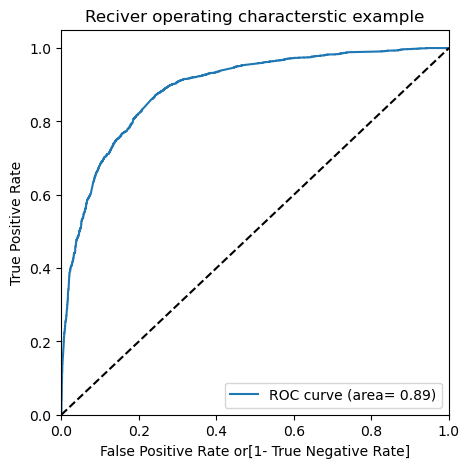

In [153]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step-10: 2.Finding Optimal Cutoff Point

In [154]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.308354,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.225133,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.379808,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.875095,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.151081,3934,0,1,1,0,0,0,0,0,0,0,0


In [155]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.622758  0.972019  0.407546
0.2   0.2  0.770099  0.915653  0.680410
0.3   0.3  0.801020  0.865775  0.761119
0.4   0.4  0.813853  0.766829  0.842829
0.5   0.5  0.817254  0.698702  0.890305
0.6   0.6  0.810142  0.639092  0.915542
0.7   0.7  0.789116  0.533252  0.946777
0.8   0.8  0.765615  0.437551  0.967766
0.9   0.9  0.713667  0.269667  0.987256


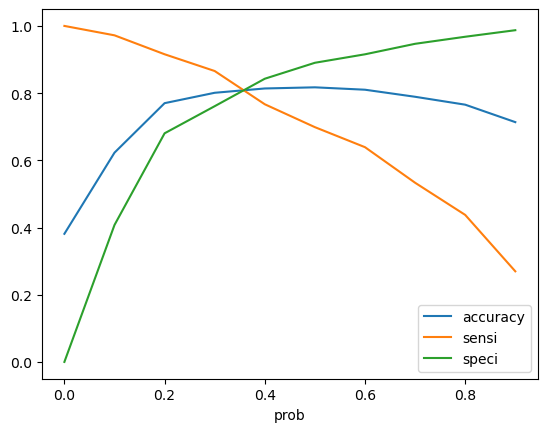

In [156]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
# i think we can take 0.38 ~ 0.4 as Optimum point as cutoof probability

In [ ]:
# making final prediction

In [157]:
y_train_pred_final['final_predicted']= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.37 else 0 )
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.308354,1871,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.225133,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.379808,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.875095,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.151081,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [158]:
y_train_pred_final['lead_Score']= y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(10)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_Score
0,0,0.308354,1871,0,1,1,1,1,0,0,0,0,0,0,0,31
1,0,0.225133,6795,0,1,1,1,0,0,0,0,0,0,0,0,23
2,0,0.379808,3516,0,1,1,1,1,0,0,0,0,0,0,1,38
3,0,0.875095,8105,1,1,1,1,1,1,1,1,1,1,0,1,88
4,0,0.151081,3934,0,1,1,0,0,0,0,0,0,0,0,0,15
5,1,0.989909,4844,1,1,1,1,1,1,1,1,1,1,1,1,99
6,0,0.144468,3297,0,1,1,0,0,0,0,0,0,0,0,0,14
7,1,0.985568,8071,1,1,1,1,1,1,1,1,1,1,1,1,99
8,0,0.085326,987,0,1,0,0,0,0,0,0,0,0,0,0,9
9,1,0.928800,7423,1,1,1,1,1,1,1,1,1,1,1,1,93


In [159]:
check_df= y_train_pred_final.loc[y_train_pred_final['Converted']==1, ['Converted','final_predicted']]
check_df['final_predicted'].value_counts()

final_predicted
1    1940
0     526
Name: count, dtype: int64

In [160]:
TP/float(TP+FP)

0.7969472710453284

In [ ]:
# the final conversion rate is 79.6~ 80%

In [161]:
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.8090599876314162

In [163]:
conf2= metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
conf2

array([[3293,  709],
       [ 526, 1940]], dtype=int64)

In [165]:
TP = conf2[1,1] # true positive 
TN = conf2[0,0] # true negatives
FP = conf2[0,1] # false positives
FN = conf2[1,0] # false negatives

In [166]:
 accuracy of train set is 0.7969472710453284, test set is 0.7594381035996488 difference is around 0.4

0.786699107866991

In [167]:
TN/float(TN+FP)

0.8228385807096452

In [169]:
FP/float(TN+FP)

0.1771614192903548

In [170]:
TN/float(TN+FN)

0.862267609321812

### Step-11: Precision and Recall

In [171]:
confusion= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion

array([[3563,  439],
       [ 743, 1723]], dtype=int64)

In [172]:
from sklearn.metrics import precision_score, recall_score

In [173]:
# precision 
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7969472710453284

In [175]:
# recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6987023519870236

In [ ]:
### Precision and recall tradeoff

In [176]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [179]:
from sklearn.metrics import precision_recall_curve

In [180]:
p,r, thresholds= precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

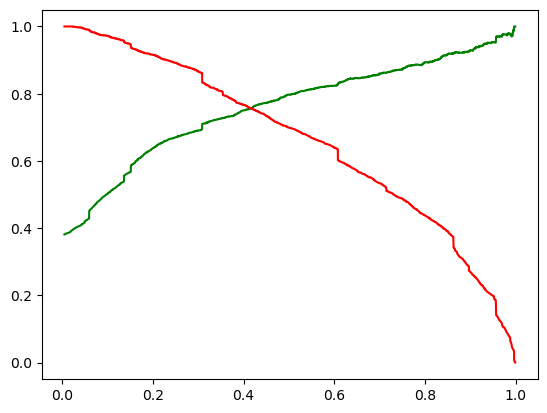

In [181]:
plt.plot(thresholds, p[:-1],"g-")
plt.plot(thresholds, r[:-1],"r-")
plt.show()

### Step-12: Making predictions

In [182]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [183]:
X_test= X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_google,Lead Source_organic search,Lead Source_referral sites,Do Not Email_yes,Last Activity_sms sent,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_unreachable
4269,0.031873,0.444982,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2376,0.000000,0.000000,1,0,0,0,0,0,1,0,1,0,0,0,0,0
7766,0.019920,0.025968,0,0,1,0,0,0,0,0,0,1,0,0,0,1
9199,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4359,0.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [184]:
X_test_sm= sm.add_constant(X_test)

In [185]:
y_test_pred = res.predict(X_test_sm)

In [186]:
y_test_pred[:10]

4269    0.524664
2376    0.956097
7766    0.938414
9199    0.151081
4359    0.862437
9186    0.676038
1631    0.566811
8963    0.221109
8007    0.044521
5324    0.442905
dtype: float64

In [192]:
y_test_pred_1= pd.DataFrame(y_test_pred)

In [193]:
y_test_pred_1

,0
4269,0.524664
2376,0.956097
7766,0.938414
9199,0.151081
4359,0.862437
...,...
8649,0.080489
2152,0.956097
7101,0.308354
5331,0.100264


In [194]:
y_test_df = pd.DataFrame(y_test)

In [195]:
y_test_df['LeadID']= y_test_df.index

In [197]:
y_test_pred_1.reset_index(drop= True, inplace=True)
y_test_df.reset_index(drop= True, inplace=True)

In [199]:
y_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)

In [200]:
y_pred_final

,Converted,LeadID,0
0,1,4269,0.524664
1,1,2376,0.956097
2,1,7766,0.938414
3,0,9199,0.151081
4,1,4359,0.862437
...,...,...,...
2767,0,8649,0.080489
2768,1,2152,0.956097
2769,0,7101,0.308354
2770,0,5331,0.100264


In [201]:
y_pred_final= y_pred_final.rename(columns={ 0: 'Converted_Prob'})

In [203]:
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Converted_Prob'],axis=1)

In [204]:
y_pred_final.head()

,LeadID,Converted,Converted_Prob
0,4269,1,0.524664
1,2376,1,0.956097
2,7766,1,0.938414
3,9199,0,0.151081
4,4359,1,0.862437


In [205]:
y_pred_final['final_predicted']=y_pred_final.Converted_Prob.map(lambda x: 1 if x>0.37 else 0)

In [206]:
y_pred_final.head()

,LeadID,Converted,Converted_Prob,final_predicted
0,4269,1,0.524664,1
1,2376,1,0.956097,1
2,7766,1,0.938414,1
3,9199,0,0.151081,0
4,4359,1,0.862437,1


In [207]:
y_train_pred_final['lead_score']= y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(10)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_Score,lead_score
0,0,0.308354,1871,0,1,1,1,1,0,0,0,0,0,0,0,31,52.0
1,0,0.225133,6795,0,1,1,1,0,0,0,0,0,0,0,0,23,96.0
2,0,0.379808,3516,0,1,1,1,1,0,0,0,0,0,0,1,38,94.0
3,0,0.875095,8105,1,1,1,1,1,1,1,1,1,1,0,1,88,15.0
4,0,0.151081,3934,0,1,1,0,0,0,0,0,0,0,0,0,15,86.0
5,1,0.989909,4844,1,1,1,1,1,1,1,1,1,1,1,1,99,68.0
6,0,0.144468,3297,0,1,1,0,0,0,0,0,0,0,0,0,14,57.0
7,1,0.985568,8071,1,1,1,1,1,1,1,1,1,1,1,1,99,22.0
8,0,0.085326,987,0,1,0,0,0,0,0,0,0,0,0,0,9,4.0
9,1,0.928800,7423,1,1,1,1,1,1,1,1,1,1,1,1,93,44.0


In [209]:
check_test_df= y_train_pred_final.loc[y_train_pred_final['Converted']==1, ['Converted','final_predicted']]
check_test_df['final_predicted'].value_counts()

final_predicted
1    1940
0     526
Name: count, dtype: int64

In [211]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8181818181818182

In [212]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1403,  274],
       [ 230,  865]], dtype=int64)

In [213]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [214]:
TP/float(TP+FN)

0.7899543378995434

In [216]:
TN/float(TN+FP)

0.836612999403697

In [217]:
TP/float(TP+FP)

0.7594381035996488

In [218]:
FP/float(TN+FP)

0.16338700059630293

In [219]:
TN/float(TN+FN)

0.8591549295774648

In [220]:
# precision 
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7594381035996488
recall  0.7899543378995434


In [222]:
p,r, thresholds= precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

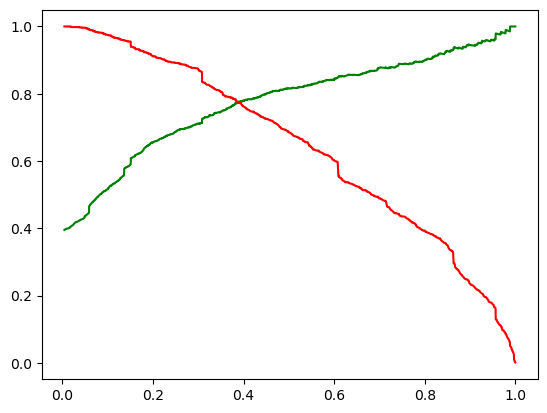

In [223]:
plt.plot(thresholds, p[:-1],"g-")
plt.plot(thresholds, r[:-1],"r-")
plt.show()

In [ ]:
# we can take 0.37 ~ 0.4 as the

In [ ]:
# accuracy of train set is 0.7969472710453284, test set is 0.7594381035996488 difference is around 0.4

### Observations:
1.accuracy of train set is 79.6%, test set is 75.9% difference is around 0.4

2.Sensitivity train set is 78.6%, test set is 78.9% increased by 0.3%

3.Specificity(TN) of train: 82.2%, test: 83.6%

4.False Positive(FP) of train: 17.7%, test: 16.3%

5.True negative(TN) of train: 86.2%, test: 85.9% decreased by 0.3%

6.precision of train: 79.6%, test: 75.9%, decreased by 3.7%

7.recall: train: 69.8%, test: 78.9%, increased by 9.1%
            
Overall the high recall and precision values indicates that it 
identifies positive cases while maintaining good number false positives.

High specificity and low flase positive rates futher validate the model's reliability

Overall, this is a model is a good model.